# BookMobile Analysis

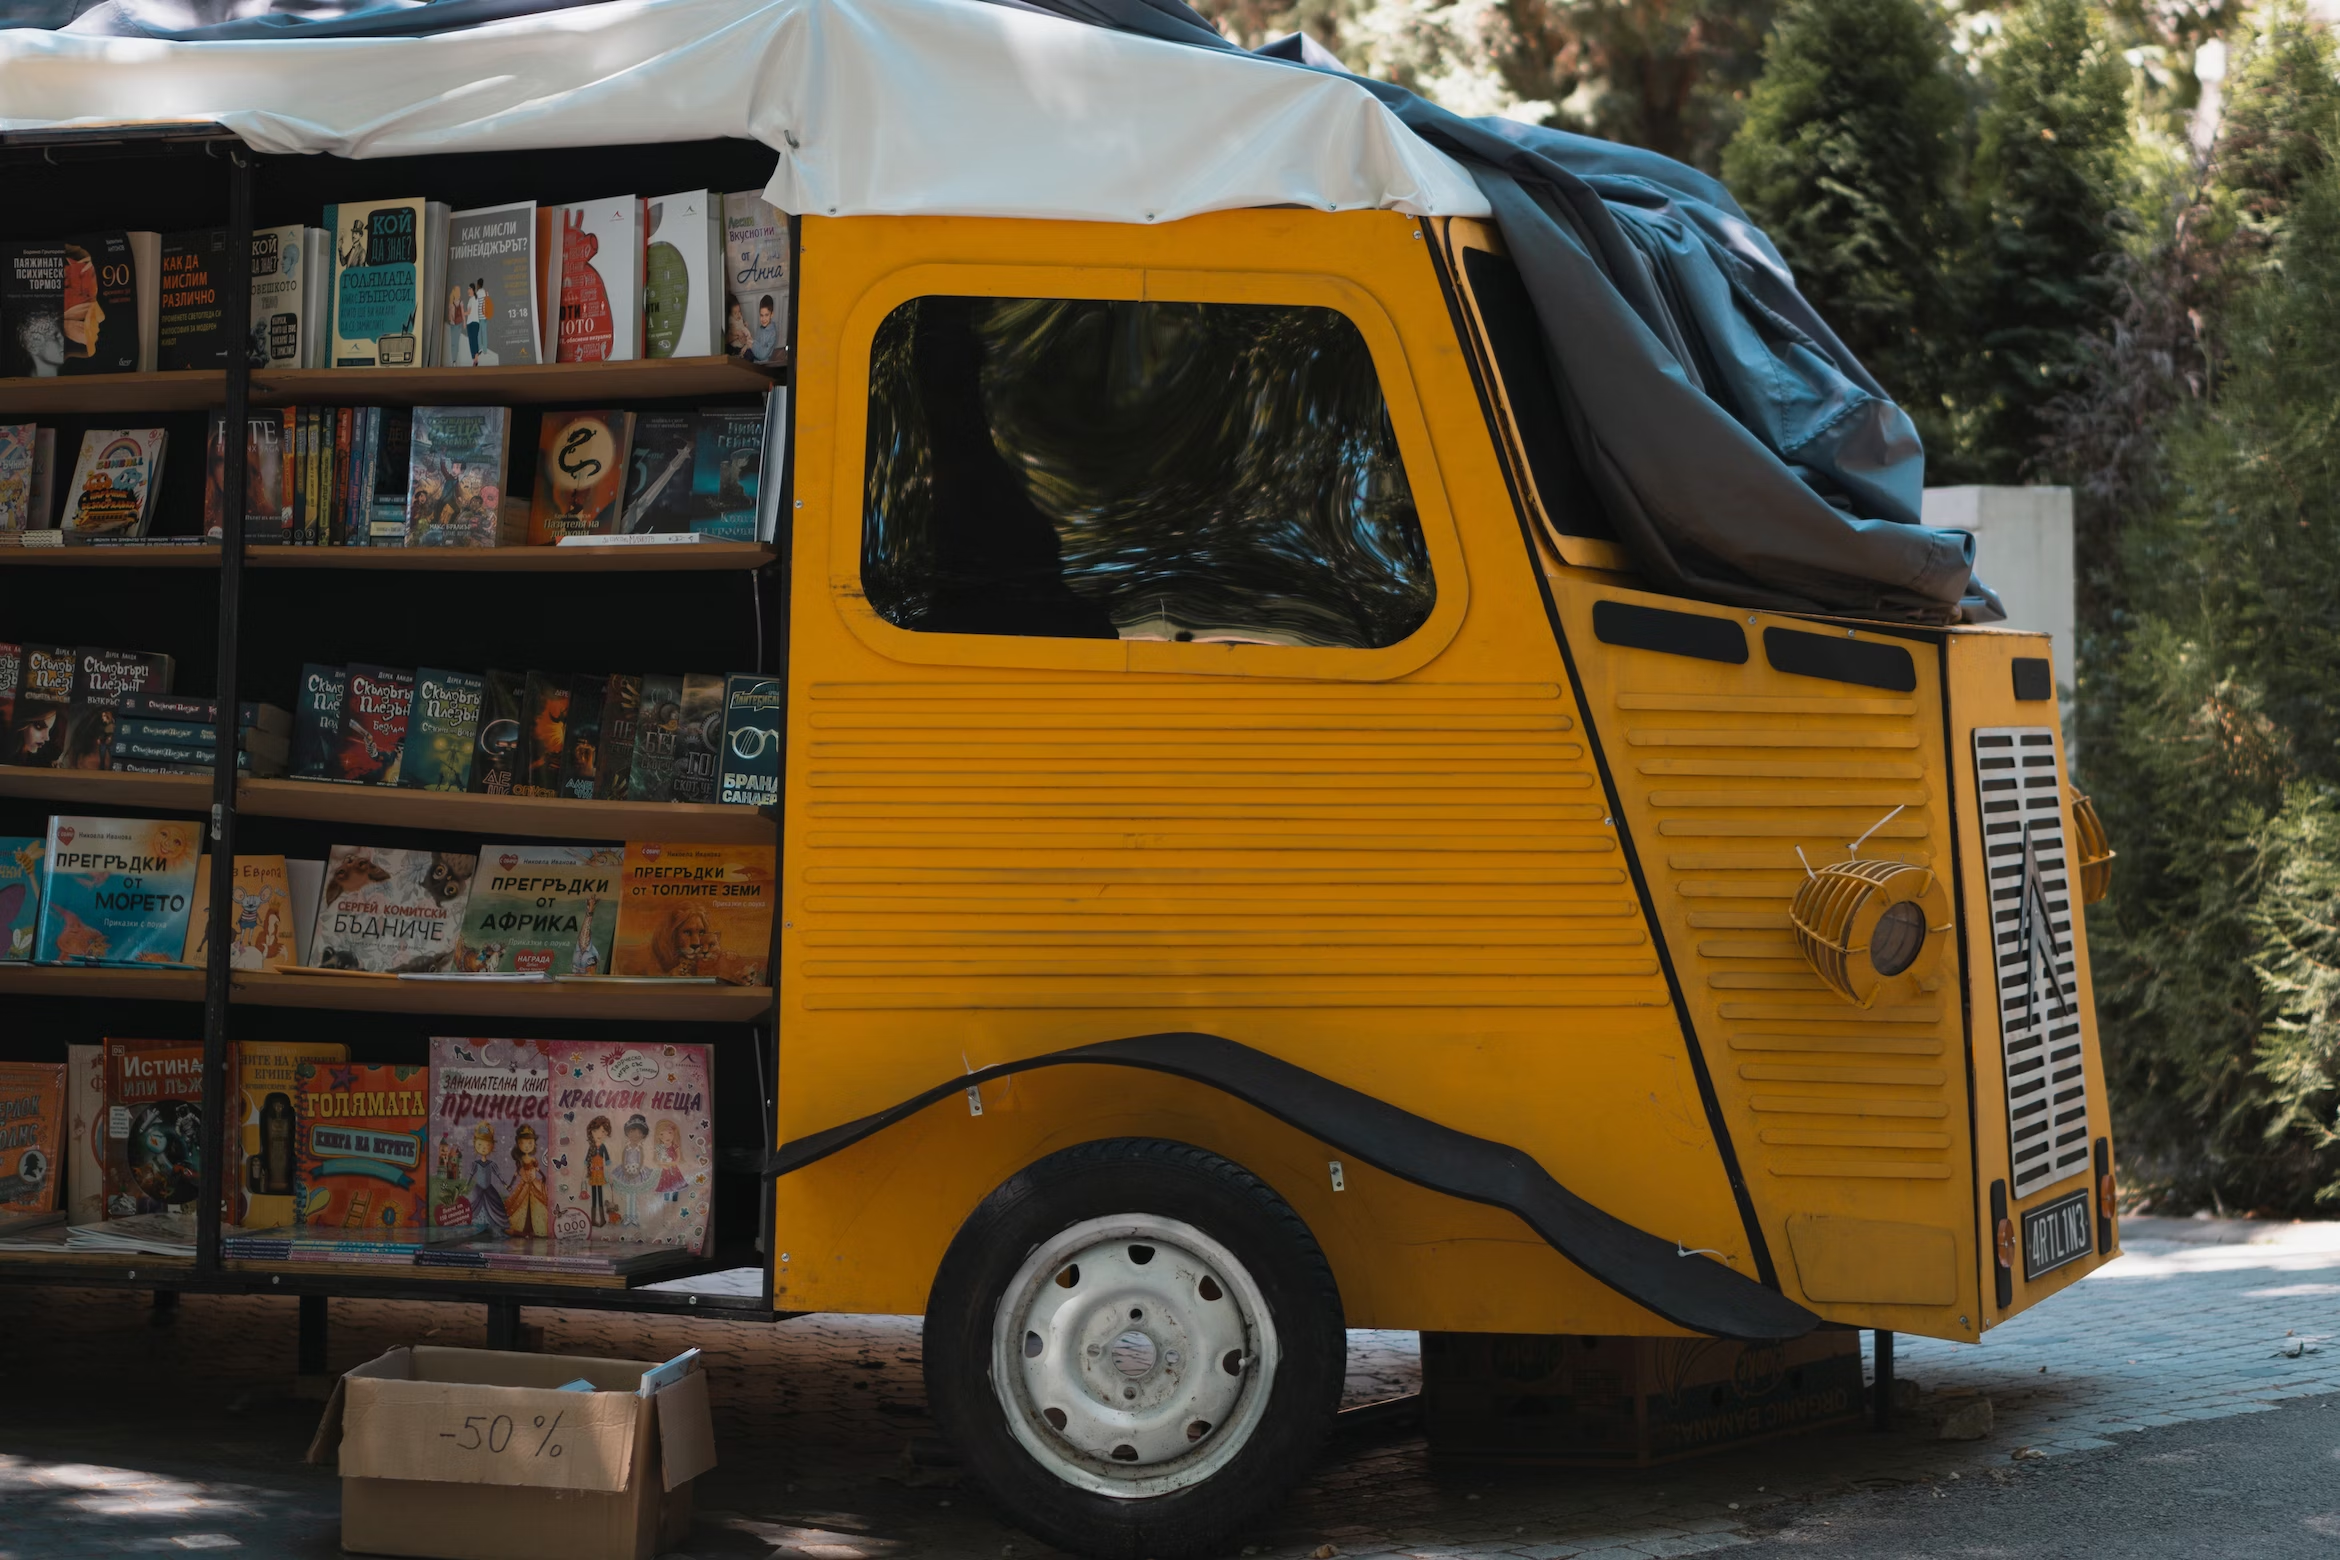

# Introduction

**Context**

BookMobile is a travelling library and bookstore whos fleet of buses rotate through rural communities. Their primary business goal is to provide access to excellent books while giving lesser known authors and publishers opportunities to expand their outreach. As a result BookMobile's fleet travels year round and rotates its stock annually to ensure regular opportunties for authors and incentivise customers to return. The company has completed it's first successful tour and is now wanting to evaluate its catalogue and business model before restocking the fleet in preperation for its next tour. 

**Objectives:**
- Report on the overall integrity of the database and provide feedback on its structure and efficacy.
- Examine the sales and checkout rates across the catalogue and advise on what books to stock for the upcoming tour. 
- Compare sales and checkout rates and outline the engagement and efficacy of both business models.
- Explore sales rates between different formats to minimise the need for transporting duplicate titles. 

**Key Questions:**
- Overall, what is the status of the database? Should other metrics be tracked and included?
- What are the qualities of successful and unsuccessful books?
- What factors effect a books checkout / sales numbers i.e. reviews, genre, price, format etc.
- Is there seasonality in sales or checkout numbers?
- How do sales and checkout rates compare? Based on the available information which model drives the most engagement with the company?
- Is there a particular format that is more popular? 


**Data Source:**

This dataset sourced from [Tableau](https://help.tableau.com/current/pro/desktop/en-us/bookshop_data.htm) 

**Note:**

While there are many BookMobile-esque like organisations in operation, this specific dataset and scenario is fictious. This analysis is purely for the skill development and presentation of its analyst, [Grace Morgan Riddell](https://www.gracefulanalytics.com/).

# 1. Data Import & Database Creation

In [5]:
#Importing libraries

import pandas as pd
import sqlite3
import sqlalchemy
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
# Creating a database to store 

conn = sqlite3.connect('book_mobile')

In [7]:
# Connecting to the database and enabling magic command.
%sql sqlite:///book_mobile

In [ ]:
# Importing the excel file and saving each sheet as a seperate table. 

path = r"C:\Users\grace\OneDrive\Projects\Professional\9. Bookmobile\3_Data\Clean Data\bm_master_clean.xlsx"
book_info = pd.read_excel(path, sheet_name = 0)
author = pd.read_excel(path, sheet_name = 1)
award = pd.read_excel(path, sheet_name = 2)
checkouts = pd.read_excel(path, sheet_name = 3)
stock = pd.read_excel(path, sheet_name = 4)
publisher = pd.read_excel(path, sheet_name = 5)
ratings = pd.read_excel(path, sheet_name = 6)
series = pd.read_excel(path, sheet_name = 7)
sales_q1 = pd.read_excel(path, sheet_name = 8)
sales_q2 = pd.read_excel(path, sheet_name = 9)
sales_q3 = pd.read_excel(path, sheet_name = 10)
sales_q4 = pd.read_excel(path, sheet_name = 11)

In [ ]:
# Saving each table to the database.

Book_Info.to_sql('Book_Info', conn, index=False)
Author.to_sql('Author', conn, index=False)
Award.to_sql('Award', conn, index=False)
Checkouts.to_sql('Checkouts', conn, index=False)
Stock.to_sql('Stock', conn, index=False)
Publisher.to_sql('Publisher', conn, index=False)
Ratings.to_sql('Ratings', conn, index=False)
Series.to_sql('Series', conn, index=False)
Sales_Q1.to_sql('Sales_Q1', conn, index=False)
Sales_Q2.to_sql('Sales_Q2', conn, index=False)
Sales_Q3.to_sql('Sales_Q3', conn, index=False)
Sales_Q4.to_sql('Sales_Q4', conn, index=False)

# 2. Data Checks
Prior to uploading I performed the following checks and edits to the dataset in its original Excel format:
- Standardised formatting and naming conventions
- Checked for duplicates
- Checked for special characters
- Changed some data types
- Checked for outliers and typos
- Removed excess spacing


**Observations**
- There is a book within the book_info table (book_id AD222) that has no title or auth_id. It does however have sales and checkouts assosiated with book_id
- There are 8 authors in the author table with no books or auth_id's assosiated to them. 
- There are 2 books in the book_info table that are missing from the checkouts table, 'CC830' and 'DG384'.
- There is 1 book (CH392) in the checkout table that is missing from the book_info table.
- The book (DG384O) is missing from both the stock and checkouts table 
- The book 'DG384' is missing from the ratings table.

In [33]:
%%sql
-- Checking table import

SELECT 
    name 
FROM sqlite_master 
WHERE type='table';

 * sqlite:///book_mobile
Done.


[('Book_Info',),
 ('Author',),
 ('Award',),
 ('Checkouts',),
 ('Stock',),
 ('Publisher',),
 ('Ratings',),
 ('Sales_Q1',),
 ('Sales_Q2',),
 ('Sales_Q3',),
 ('Sales_Q4',),
 ('Series',)]

In [11]:
%%sql
-- Checking the tables, column names and data types
SELECT * 
FROM sqlite_master;

 * sqlite:///book_mobile
Done.


[('table', 'Book_Info', 'Book_Info', 2, 'CREATE TABLE "Book_Info" (\n"book_id" TEXT,\n  "title" TEXT,\n  "auth_id" TEXT,\n  "genre" TEXT,\n  "series_id" TEXT,\n  "volume_number" REAL\n)'),
 ('table', 'Author', 'Author', 3, 'CREATE TABLE "Author" (\n"auth_id" TEXT,\n  "first_name" TEXT,\n  "last_name" TEXT,\n  "country_ of_residence" TEXT\n)'),
 ('table', 'Award', 'Award', 4, 'CREATE TABLE "Award" (\n"book_title" TEXT,\n  "award_name" TEXT,\n  "year_won" INTEGER\n)'),
 ('table', 'Checkouts', 'Checkouts', 5, 'CREATE TABLE "Checkouts" (\n"book_id" TEXT,\n  "checkout_month" TEXT,\n  "number_of_checkouts" INTEGER\n)'),
 ('table', 'Stock', 'Stock', 10, 'CREATE TABLE "Stock" (\n"isbn" TEXT,\n  "book_id" TEXT,\n  "format" TEXT,\n  "pub_id" TEXT,\n  "publication_date" TIMESTAMP,\n  "pages" INTEGER,\n  "print_run_size" INTEGER,\n  "price" REAL\n)'),
 ('table', 'Publisher', 'Publisher', 13, 'CREATE TABLE "Publisher" (\n"pub_id" TEXT,\n  "publishing_house" TEXT,\n  "city" TEXT,\n  "state" TEXT,\n  "country" TEXT,\n  "year_established" INTEGER,\n  "marketing_spend" INTEGER\n)'),
 ('table', 'Ratings', 'Ratings', 14, 'CREATE TABLE "Ratings" (\n"book_id" TEXT,\n  "rating" INTEGER,\n  "reviewer_id" INTEGER,\n  "review_id" INTEGER\n)'),
 ('table', 'Sales_Q1', 'Sales_Q1', 289, 'CREATE TABLE "Sales_Q1" (\n"sale_date" TIMESTAMP,\n  "isbn" TEXT,\n  "discount" REAL,\n  "item_id" TEXT,\n  "order_id" TEXT\n)'),
 ('table', 'Sales_Q2', 'Sales_Q2', 429, 'CREATE TABLE "Sales_Q2" (\n"sale_date" TIMESTAMP,\n  "isbn" TEXT,\n  "discount" REAL,\n  "item_id" TEXT,\n  "order_id" TEXT\n)'),
 ('table', 'Sales_Q3', 'Sales_Q3', 671, 'CREATE TABLE "Sales_Q3" (\n"sale_date" TIMESTAMP,\n  "isbn" TEXT,\n  "discount" REAL,\n  "item_id" TEXT,\n  "order_id" TEXT\n)'),
 ('table', 'Sales_Q4', 'Sales_Q4', 1074, 'CREATE TABLE "Sales_Q4" (\n"sale_date" TIMESTAMP,\n  "isbn" TEXT,\n  "discount" REAL,\n  "item_id" TEXT,\n  "order_id" TEXT\n)'),
 ('table', 'Series', 'Series', 288, 'CREATE TABLE "Series" (\n"series_id" TEXT,\n  "series_name" TEXT,\n  "planned_volumes" INTEGER,\n  "book_tour_events" INTEGER\n)')]

There is an additional space in 'country_ of_residence' in the author table

In [41]:
%%sql
-- updating authors table to remove additional space in table name.

ALTER TABLE author
RENAME COLUMN "country_ of_residence" TO country_of_residence

 * sqlite:///book_mobile
Done.


[]

In [42]:
%%sql
-- double checking table update

SELECT *
FROM author
LIMIT 5;

 * sqlite:///book_mobile
Done.


[('AS443', 'Abraham', 'Stackhouse', 'Norway'),
 ('AW980', 'Amelia', 'Wangerin, Jr.', 'New Zealand'),
 ('AI923', 'Anastasia', 'Inez', 'New Zealand'),
 ('AM329', 'Arthur', 'McCrumb', 'New Zealand'),
 ('AH957', 'Arturo', 'Hijuelos', 'United Kingdom')]

# 3. Summary Statistics & Tables Overview

### 3.1 Book_info table

The book_info table holds details for all of the books within the BookMobile catalogue. Each record pertains to one title within the catalogue.

 - *book_id* = Unique code for each title
 - *title* = Name of the book
 - *auth_id* = Unique code for each author
 - *genre* = The books genre
 - *series_id* = Unique code given to a series. Each series has a different code, each book within a series share the same series code
 - *volume_number* = Number the book is within a series. 

In [24]:
%%sql
-- Quick inspection of the table


SELECT *
FROM book_info
LIMIT 5;

 * sqlite:///book_mobile
Done.


[('AD222', None, None, 'Childrens', None, None),
 ('AK974', 'Adventures of Kaya', 'WH901', 'Young Adult', None, None),
 ('AM124', 'A Horrible Human with the Habits of a Monster', 'KD840', 'Fiction', None, None),
 ('AY135', 'And I Said Yes', 'EK605', 'Fiction', None, None),
 ('BB194', 'Ballinby Boys', 'AM329', 'SciFi/Fantasy', None, None)]

In [38]:
%%sql
-- Getting summary stats on the book_info table

SELECT
    COUNT(*) AS total_books,
    COUNT(DISTINCT book_id) AS unique_books,
    COUNT(DISTINCT title) AS unique_titles,
    COUNT(DISTINCT auth_id) AS unique_authors,
    COUNT(DISTINCT genre) AS unique_genres,
    COUNT(DISTINCT series_id) AS unique_series,
    MIN(volume_number) AS min_volume,
    MAX(volume_number) AS max_volume
FROM book_info;

 * sqlite:///book_mobile
Done.


[(58, 58, 57, 33, 8, 6, 1.0, 7.0)]

There is one less 'unique_title' (57) then there is 'unique_book' (58) because there is a book without a title or author.  As this title may have sales data we will leave it as is. 

In [99]:
%%sql
-- Exploring the range and distrubution of genres within the catalogue

SELECT 
    genre, 
    COUNT(genre) AS count,
    ROUND(COUNT(genre) * 100.0 / (SELECT COUNT(*) FROM book_info), 2) AS genre_ratio
FROM book_info
GROUP BY genre
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('Fiction', 15, 25.86),
 ('SciFi/Fantasy', 11, 18.97),
 ('Romance', 7, 12.07),
 ('Nonfiction', 7, 12.07),
 ('Young Adult', 6, 10.34),
 ('Childrens', 6, 10.34),
 ('Mystery', 3, 5.17),
 ('Memoir', 3, 5.17)]

Although the quantity of books of each genre varies, there is a broad enough range to cater to a vareity of tastes and ages. 

### 3.2 Author table
The author table provides details on the authors of the books within the catalogue.

 - *auth_id* = Unique code for each author
 - *first_name* = Authors first name
 - *last_name* = Authors last name
 - *country_of_residence* = Country where the author lives. 

In [87]:
%%sql
-- Quick overview
SELECT *
FROM author
LIMIT 5;

 * sqlite:///book_mobile
Done.


[('AS443', 'Abraham', 'Stackhouse', 'Norway'),
 ('AW980', 'Amelia', 'Wangerin, Jr.', 'New Zealand'),
 ('AI923', 'Anastasia', 'Inez', 'New Zealand'),
 ('AM329', 'Arthur', 'McCrumb', 'New Zealand'),
 ('AH957', 'Arturo', 'Hijuelos', 'United Kingdom')]

In [46]:
%%sql
-- Summary stats and basic overview

SELECT
    COUNT(*) AS total_authors,
    COUNT(DISTINCT auth_id) AS unique_authors,
    COUNT(DISTINCT first_name) AS unique_first_names,
    COUNT(DISTINCT last_name) AS unique_last_names,
    COUNT(DISTINCT country_of_residence) AS unique_countries,
    MIN(LENGTH(first_name)) AS min_first_name_length,
    MAX(LENGTH(first_name)) AS max_first_name_length,
    MIN(LENGTH(last_name)) AS min_last_name_length,
    MAX(LENGTH(last_name)) AS max_last_name_length
FROM author;

 * sqlite:///book_mobile
Done.


[(41, 41, 40, 41, 12, 4, 9, 4, 13)]

With 41 unique authors and 58 unique books we can see that the collection hold titles that are by the same author. This lines up with the fact that there are several series within the catalogue. 
Addtionally there are two authors with the same first name. 

In [47]:
%%sql
-- Looking at the distrubtion of countries of residence among the authors.

SELECT 
    country_of_residence, 
    COUNT(auth_id) AS Count
FROM author
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('United States', 9),
 ('New Zealand', 7),
 ('United Kingdom', 4),
 ('Hong Kong', 4),
 ('Brazil', 4),
 ('Norway', 3),
 ('Netherlands', 2),
 ('Germany', 2),
 ('China', 2),
 ('Canada', 2),
 ('South Africa', 1),
 ('Singapore', 1)]

A broad range of nationalities among the authors, this could help appeal to a range of different readers

In [62]:
%%sql
-- How many books of each author is in stock?

SELECT 
    a.first_name || ' ' || a.last_name AS name,
    bi.auth_id,
    COUNT(bi.title) AS num_of_books
FROM author AS a
LEFT JOIN book_info AS bi
ON a.auth_id = bi.auth_id
GROUP BY name
ORDER BY 3;

 * sqlite:///book_mobile
Done.


[('Amelia Wangerin, Jr.', None, 0),
 ('Anastasia Inez', None, 0),
 ('Arturo Hijuelos', None, 0),
 ('Bernard Hopf', None, 0),
 ('Bravig Lewisohn', None, 0),
 ('Darryl Fleischman', None, 0),
 ('Hamlin Myrer', None, 0),
 ('Wendell Barton', None, 0),
 ('Abraham Stackhouse', 'AS443', 1),
 ('Arthur McCrumb', 'AM329', 1),
 ('Clifford Wolitzer', 'CW626', 1),
 ('David Beam', 'DB605', 1),
 ('Elizabeth Herbach', 'EH487', 1),
 ('Grace Harrison', 'GH671', 1),
 ('Jonathan Kotzwinkle', 'JK592', 1),
 ('Kenneth Douglas', 'KD840', 1),
 ('Kris Elegant', 'KE397', 1),
 ('Langston Lippman', 'LL585', 1),
 ('Leonard Nabokov', 'LN356', 1),
 ('Lori Kaan', 'LK915', 1),
 ('Oliver Lowry', 'OL640', 1),
 ('Patricia Hazzard', 'PH273', 1),
 ('Philip Antrim', 'PA878', 1),
 ('Phoebe Brown', 'PB147', 1),
 ('R.M. Larner', 'RL217', 1),
 ('Robert Milofsky', 'RM781', 1),
 ('Ward Haigh', 'WH901', 1),
 ('Carolyn Segal', 'CS190', 2),
 ('Charles Fenimore', 'CF829', 2),
 ('Hillary Barnhardt', 'HB302', 2),
 ('Jill Hergesheimer', 'JH502', 2),
 ('John W. Spanogle', 'JS525', 2),
 ('Kathy Yglesias', 'KY296', 2),
 ('Malin Wolff', 'MW974', 2),
 ('Robert Plimpton', 'RP438', 2),
 ('Ursula Karénine', 'UK129', 2),
 ('Bianca Thompson', 'BT132', 3),
 ('Burton Malamud', 'BM856', 3),
 ('Elmer Komroff', 'EK605', 3),
 ('Gloria Green', 'GG800', 3),
 ('Lynne Danticat', 'LD375', 8)]

- There are 8 authors listed that do not have books in the catalogue.
- For the majority of authors, there are 1-2 books in stock.

### 3.3 Awards table
The awards table contains the title and award a book won along with the year that it was won.

- *book_title* = Name of the book
- *award_name* = Name of the award 
- *year_won* = Year the book won the award.

**Note:** As this is a fictitious dataset, the years are all set in the furture. This has no effect on the analysis as that column is not used.  

In [48]:
%%sql

SELECT *
FROM award
LIMIT 5;

 * sqlite:///book_mobile
Done.


[('Post Alley', 'Agatha Award', 2179),
 ('Alanna Saves the Day', 'Caldecott Medal', 2186),
 ('Portmeirion', 'Hugo Award', 2188),
 ('Rystwyth', 'Hugo Award', 2193),
 ('The Mallemaroking', 'Hugo Award', 2179)]

In [24]:
%%sql
-- Creating the summary stats for the table

SELECT 
    COUNT(book_title) AS total_titles,
    COUNT(DISTINCT(book_title)) AS unique_books,
    COUNT(award_name) AS total_awards,
    COUNT(DISTINCT(award_name)) AS unique_awards,
    COUNT(year_won) AS total_years,
    COUNT(DISTINCT(year_won)) AS unique_years
FROM award;
    

 * sqlite:///book_mobile
Done.


[(18, 17, 18, 12, 18, 11)]

In [6]:
%%sql
-- How many of each award was won by books within the catalogue

SELECT 
    DISTINCT(award_name),
    COUNT(book_title) AS num_of_books,
    GROUP_CONCAT(DISTINCT book_title) AS book_titles
FROM award
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('Pulitzer', 3, "Inconvenient Confessions: a memoir,We're Sisters and We Kinda Like Each Other,Hashtag QuokkaSelfie"),
 ('National Book Award', 3, 'Nothing But Capers,Cimornul,The Spark and The Ashes'),
 ('Hugo Award', 3, 'Portmeirion,Rystwyth,The Mallemaroking'),
 ("Young Reader's Choice Award", 1, 'Mortality'),
 ('World Fantasy Award', 1, 'Ballinby Boys'),
 ('RITA Award', 1, 'Saint Esme'),
 ('PEN/Faulkner Award', 1, 'The life and times of an utterly inconsequential person'),
 ('Newberry Medal', 1, 'Heliotrope Pajamas'),
 ('Nebula Award', 1, 'The Mallemaroking'),
 ('Man Booker', 1, 'No More Lightning'),
 ('Caldecott Medal', 1, 'Alanna Saves the Day'),
 ('Agatha Award', 1, 'Post Alley')]

In [7]:
%%sql
-- Are there books that have won multiple awards?

SELECT 
    book_title,
    COUNT(award_name) AS num_of_awards,
    GROUP_CONCAT(DISTINCT(award_name)) AS award_won
FROM award
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('The Mallemaroking', 2, 'Hugo Award,Nebula Award'),
 ("We're Sisters and We Kinda Like Each Other", 1, 'Pulitzer'),
 ('The life and times of an utterly inconsequential person', 1, 'PEN/Faulkner Award'),
 ('The Spark and The Ashes', 1, 'National Book Award'),
 ('Saint Esme', 1, 'RITA Award'),
 ('Rystwyth', 1, 'Hugo Award'),
 ('Post Alley', 1, 'Agatha Award'),
 ('Portmeirion', 1, 'Hugo Award'),
 ('Nothing But Capers', 1, 'National Book Award'),
 ('No More Lightning', 1, 'Man Booker'),
 ('Mortality', 1, "Young Reader's Choice Award"),
 ('Inconvenient Confessions: a memoir', 1, 'Pulitzer'),
 ('Heliotrope Pajamas', 1, 'Newberry Medal'),
 ('Hashtag QuokkaSelfie', 1, 'Pulitzer'),
 ('Cimornul', 1, 'National Book Award'),
 ('Ballinby Boys', 1, 'World Fantasy Award'),
 ('Alanna Saves the Day', 1, 'Caldecott Medal')]

Only one book (Mallemaroking) has won multiple awards.  

### 3.4 Checkouts table

The checkout table contains the total number of checkouts per book, per month. 

- *book_id* = Unique code for each title within the catalogue
- *checkout_month* = Month that book was checked out
- *number_of_checkouts* = The total number of checkouts for that book for that month. 

In [61]:
%%sql
-- quick look

SELECT *
FROM checkouts
LIMIT 5;

 * sqlite:///book_mobile
Done.


[('AD222', 'January', 40),
 ('AD222', 'March', 39),
 ('AD222', 'November', 34),
 ('AD222', 'April', 33),
 ('AD222', 'May', 33)]

In [47]:
%%sql
-- Summary stats and basic overview

SELECT
    COUNT(DISTINCT book_id) AS unique_books_checked_out,
    COUNT(DISTINCT checkout_month) AS unique_checkout_months,
    SUM(number_of_checkouts) AS total_checkouts_count,
    MIN(number_of_checkouts) AS min_checkouts,
    MAX(number_of_checkouts) AS max_checkouts
FROM checkouts;

 * sqlite:///book_mobile
Done.


[(57, 12, 13533, 2, 130)]

- 57 books have been checked out (out of the 58 in our catalogue) indicates that 1 title didn't get checked out once the entire year. 
- Each month had checkouts recorded
- One title only had 2 checkouts in a month
- The most checkouts for a single title for a whole month is 130

In [110]:
%%sql
-- Summary stats of checkouts by book_id
SELECT 
    book_id, 
    SUM(number_of_checkouts) AS total_checkouts,
    Min(number_of_checkouts) AS Min_per_month,
    MAX(number_of_checkouts) AS Max_per_month,
    ROUND(AVG(number_of_checkouts),0) AS Avg_per_Month
FROM checkouts
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('RR774', 1332, 97, 124, 111.0),
 ('TM925', 1243, 60, 130, 104.0),
 ('HP265', 909, 57, 104, 76.0),
 ('ZT703', 576, 37, 52, 48.0),
 ('MW621', 572, 41, 53, 48.0),
 ('PP866', 547, 14, 97, 46.0),
 ('WG715', 510, 28, 49, 43.0),
 ('NR695', 469, 27, 49, 39.0),
 ('AK974', 464, 16, 64, 39.0),
 ('TS869', 428, 15, 62, 36.0),
 ('TH296', 399, 23, 41, 33.0),
 ('SE355', 393, 25, 36, 33.0),
 ('AD222', 384, 25, 40, 32.0),
 ('BB194', 328, 21, 33, 27.0),
 ('TT773', 259, 16, 26, 22.0),
 ('BF374', 247, 15, 28, 21.0),
 ('SS361', 246, 19, 22, 21.0),
 ('TA182', 229, 15, 22, 19.0),
 ('BS284', 219, 7, 36, 18.0),
 ('BC244', 218, 14, 21, 18.0),
 ('TP887', 210, 13, 25, 18.0),
 ('LB510', 207, 14, 21, 17.0),
 ('TC188', 195, 9, 20, 16.0),
 ('TO369', 161, 10, 16, 13.0),
 ('KA663', 155, 11, 16, 13.0),
 ('ST862', 151, 8, 17, 13.0),
 ('BF889', 151, 10, 16, 13.0),
 ('NB483', 125, 8, 14, 10.0),
 ('NL209', 124, 8, 13, 10.0),
 ('PA169', 123, 7, 13, 10.0),
 ('SS693', 120, 8, 12, 10.0),
 ('DY800', 109, 5, 17, 9.0),
 ('BR858', 109, 6, 13, 9.0),
 ('CH392', 97, 5, 11, 8.0),
 ('CH391', 97, 5, 11, 8.0),
 ('WO506', 95, 5, 11, 8.0),
 ('AY135', 93, 5, 10, 8.0),
 ('TH143', 90, 6, 11, 8.0),
 ('DR914', 89, 4, 10, 7.0),
 ('WK456', 85, 5, 11, 7.0),
 ('DE571', 82, 3, 10, 7.0),
 ('IG460', 79, 4, 9, 7.0),
 ('TI225', 76, 2, 15, 8.0),
 ('TH556', 71, 4, 8, 6.0),
 ('CP573', 71, 2, 10, 6.0),
 ('TT359', 65, 3, 9, 5.0),
 ('TC401', 65, 4, 7, 5.0),
 ('AM124', 65, 3, 9, 5.0),
 ('IC739', 59, 4, 7, 5.0),
 ('NP937', 57, 4, 10, 6.0),
 ('ST303', 56, 3, 7, 5.0),
 ('IA439', 51, 2, 6, 4.0),
 ('QQ737', 48, 3, 6, 4.0),
 ('HS107', 46, 2, 6, 4.0),
 ('MM424', 43, 2, 5, 4.0),
 ('NC652', 38, 2, 5, 3.0),
 ('LS176', 3, 3, 3, 3.0)]

We can see pretty extreme range across all counts within this result. 
 - Total checkouts range from 1332 to 3
 - Min checkouts range from 97 to 3
 - Max checkouts range from 130 to 3
 - Avg monthly checkouts range from 111 to 3.

In [102]:
%%sql
-- Comparing the lists of book_ids from the two tables to find the missing book_id 

SELECT 
    book_id
FROM book_info
EXCEPT
SELECT 
    book_id
FROM checkouts;

 * sqlite:///book_mobile
Done.


[('CC830',), ('DG384',)]

I wasn't expecting to see two book_id's in this result. This implies that there may be a book_id(s) that exists within the book_info table that doesn't exist in the checkouts table and vice versa. To this test theory I will do the same query but reversing the tables


In [103]:
%%sql
-- switching tables to check theory

SELECT 
    book_id
FROM checkouts
EXCEPT
SELECT 
    book_id
FROM book_info;

 * sqlite:///book_mobile
Done.


[('CH392',)]

Curious, it appears that there is there may in fact be 3 book_id's that differ between the two tables

In [9]:
%%sql
-- Combining the two querys to show all book_ids that differ between the two tables

SELECT 
    book_id
FROM book_info
WHERE book_id NOT IN (
SELECT 
    book_id 
FROM checkouts
)

UNION

SELECT 
    book_id
FROM checkouts
WHERE book_id NOT IN 
(
SELECT 
    book_id
FROM book_info
);

 * sqlite:///book_mobile
Done.


[('CC830',), ('CH392',), ('DG384',)]

In [108]:
%%sql
-- Searching for specific id's within the book_info table

SELECT *
FROM book_info
WHERE book_id IN ('CC830', 'CH392', 'DG384');

 * sqlite:///book_mobile
Done.


[('CC830', 'Cimornul', 'JH502', 'SciFi/Fantasy', None, None),
 ('DG384', 'The Deep Grey', 'RM781', 'Fiction', None, None)]

In [109]:
%%sql

SELECT *
FROM checkouts
WHERE book_id IN ('CC830', 'CH392', 'DG384');

 * sqlite:///book_mobile
Done.


[('CH392', 'March', 11),
 ('CH392', 'October', 11),
 ('CH392', 'August', 10),
 ('CH392', 'September', 10),
 ('CH392', 'December', 9),
 ('CH392', 'January', 8),
 ('CH392', 'June', 7),
 ('CH392', 'July', 7),
 ('CH392', 'November', 7),
 ('CH392', 'February', 6),
 ('CH392', 'May', 6),
 ('CH392', 'April', 5)]

(Note: that this id appears 12 times as the query returns all instances of that id and there is one per each month were checkouts occurred)

It appears that there are 2 book_id's that are in the book_info table that are missing from the checkouts table = 'CC830' and 'DG384'.
While the checkout table has a book_id of 'CH392' that is missing from the book_info table. 
This appears to be a data entry error and should be corrected to ensure accurate cataloguing and analysis. As this issue only pertains to 3 titles, it will not have an impact on the analysis. 

In [7]:
%%sql
-- Out of the 57 titles in the checkouts table, how many were checked out each month?
SELECT 
    checkout_month, 
    COUNT(DISTINCT(book_id)) AS Count
FROM checkouts
GROUP BY checkout_month
ORDER BY
    CASE checkout_month
        WHEN 'January' THEN 1
        WHEN 'February' THEN 2
        WHEN 'March' THEN 3
        WHEN 'April' THEN 4
        WHEN 'May' THEN 5
        WHEN 'June' THEN 6
        WHEN 'July' THEN 7
        WHEN 'August' THEN 8
        WHEN 'September' THEN 9
        WHEN 'October' THEN 10
        WHEN 'November' THEN 11
        WHEN 'December' THEN 12
        ELSE NULL
    END;

 * sqlite:///book_mobile
Done.


[('January', 56),
 ('February', 55),
 ('March', 56),
 ('April', 57),
 ('May', 55),
 ('June', 56),
 ('July', 56),
 ('August', 56),
 ('September', 56),
 ('October', 55),
 ('November', 56),
 ('December', 54)]

Almost every title was checked out at least once a month. 

In [111]:
%%sql 
-- Looking at the distrubution of total checkouts by title. 

WITH summed_checkouts AS 
(
    SELECT  book_id,
            SUM(number_of_checkouts) AS total_checkouts
    FROM checkouts
    GROUP BY 1
    ORDER BY 2
)

SELECT 
    CASE 
        WHEN total_checkouts BETWEEN 0 AND 50 THEN '000-50'
        WHEN total_checkouts BETWEEN 51 AND 100 THEN '051-100'
        WHEN total_checkouts BETWEEN 101 AND 200 THEN '101-200'
        WHEN total_checkouts BETWEEN 201 AND 300 THEN '201-300'
        WHEN total_checkouts BETWEEN 301 AND 400 THEN '301-400'
        WHEN total_checkouts BETWEEN 301 AND 400 THEN '301-400'
        WHEN total_checkouts BETWEEN 401 AND 500 THEN '401-500'
        WHEN total_checkouts BETWEEN 501 AND 600 THEN '501-600'
        ELSE 'Over 600'
        END AS annual_checkout_count,
        COUNT(total_checkouts) AS books_in_range
FROM summed_checkouts
GROUP BY annual_checkout_count;

 * sqlite:///book_mobile
Done.


[('000-50', 5),
 ('051-100', 19),
 ('101-200', 11),
 ('201-300', 8),
 ('301-400', 4),
 ('401-500', 3),
 ('501-600', 4),
 ('Over 600', 3)]

The majority of titles get between 51-200 checkouts a year. 
More further exploration on what books these are any why these extremes might exist will be explored later on.  

In [43]:
%%sql
-- Total checkouts per month across all titles. 

SELECT  checkout_month, 
        SUM(number_of_checkouts) AS total_per_month
FROM checkouts
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('January', 1281),
 ('July', 1235),
 ('March', 1207),
 ('August', 1180),
 ('April', 1146),
 ('February', 1135),
 ('September', 1113),
 ('October', 1101),
 ('June', 1083),
 ('May', 1073),
 ('November', 1052),
 ('December', 927)]

Total checkouts appear fairly consistant across the year. No real indication of seasonality at this point.

### 3.5 Stock table

The stock table contains more speific details on the various editions available for each title i.e. hardcover, paperback etc. This table is more focused on the physical details of each book rather then than the story itself. 

 - *isbn* = Unique code given to each edition* of the the book
 - *book_id* = Unique code given to each title
 - *format* = Format of each edition  of the book i.e. paperback etc
 - *pub_id* = The unique code of the publisher
 - *publication_date* = The date the book was published (dates not used in this analysis)
 - *pages* = Page count of that edition
 - *print_run_size* = Number of books printed on the publication date
 - *price* = The price BookMobile sells that edition for. 


**NOTE:** To clarify, a book_id is unique to each book title. An isbn is unique to each combination of book and its various formats. This means that while there are duplicate book_id's within this table there is one unique isbn per record which identifies a book and its specific format. 



In [112]:
%%sql
-- Quick look
SELECT *
FROM stock
LIMIT 10;

 * sqlite:///book_mobile
Done.


[('989-28-3705-987-7', 'AD222', 'Trade paperback', 'CHP', '2185-09-22 00:00:00', 188, 10000, 8.99),
 ('989-28-3705-222-9', 'AK974', 'Trade paperback', 'CHP', '2182-07-23 00:00:00', 256, 35000, 11.99),
 ('989-28-79-16826-1', 'AM124', 'Graphic', 'ESP', '2189-03-24 00:00:00', 85, 3000, 23.99),
 ('989-28-79-18127-7', 'AY135', 'Hardcover', 'ESP', '2179-04-24 00:00:00', 704, 15000, 27.99),
 ('989-28-79-64693-6', 'AY135', 'Trade paperback', 'ESP', '2191-08-25 00:00:00', 645, 36000, 12.5),
 ('989-28-79-68089-3', 'BB194', 'Hardcover', 'ESP', '2179-05-18 00:00:00', 401, 10000, 21.5),
 ('989-28-3705-583-1', 'BC244', 'Board book', 'CHP', '2187-05-08 00:00:00', 13, 10000, 6.99),
 ('989-28-3705-775-0', 'BC244', 'Paperback', 'CHP', '2187-11-06 00:00:00', 22, 15000, 7.99),
 ('989-28-3705-138-3', 'BF374', 'Board book', 'CHP', '2188-05-27 00:00:00', 12, 18000, 6.99),
 ('989-28-3705-369-1', 'BF374', 'Paperback', 'CHP', '2188-10-14 00:00:00', 20, 18000, 7.99)]

In [48]:
%%sql
-- Summary Stats 

SELECT
    COUNT(*) AS total_editions,
    COUNT(DISTINCT isbn) AS unique_isbns,
    COUNT(DISTINCT book_id) AS unique_book_ids,
    COUNT(DISTINCT format) AS unique_formats,
    COUNT(DISTINCT pub_id) AS unique_pub_ids,
    MIN(publication_date) AS earliest_publication_date,
    MAX(publication_date) AS latest_publication_date,
    MIN(pages) AS min_pages,
    MAX(pages) AS max_pages,
    ROUND(AVG(pages),0) AS avg_pages,
    MIN(print_run_size) AS min_print_run_size,
    MAX(print_run_size) AS max_print_run_size,
    ROUND(AVG(print_run_size),0) AS avg_print_run_size,
    MIN(price) AS min_price,
    MAX(price) AS max_price,
    ROUND(AVG(price),2) AS avg_price
FROM stock;

 * sqlite:///book_mobile
Done.


[(95, 95, 57, 6, 4, '2178-06-02 00:00:00', '2192-09-18 00:00:00', 11, 1296, 387.0, 2000, 78000, 18400.0, 5.99, 48.0, 16.81)]

- Once again, we see 57 book_id's instead of the 58 outlined in the book_info table. Further investigation is required
- The publication dates (like in the awards table) are set in the future. Those columns are not relivent to this analysis. 
- There is quite the range of book sizes (page count)
- It appears that most books have multiple formats. This can be seen in that there are 57 unique_book_ids and 95 unique_isbns.

In [124]:
%%sql
-- Looking for the missing book_id

SELECT 
    book_id
FROM book_info
EXCEPT
SELECT 
    book_id
FROM stock;

 * sqlite:///book_mobile
Done.


[('DG384',)]

In [125]:
%%sql
-- Repeating the query switching the tables to cross reference 

SELECT 
    book_id
FROM stock
EXCEPT
SELECT 
    book_id
FROM book_info;

 * sqlite:///book_mobile
Done.


[]

We can confirm that the book with book_id "DG384" is in the book_id table and not in the stock table. 

In [126]:
%%sql
-- Double checking assumption. 

SELECT *
FROM stock
WHERE book_id == 'DG384';

 * sqlite:///book_mobile
Done.


[]

This title is indeed not in the stock list

In [127]:
%%sql
-- Looking at all details in the book_info table

SELECT *
FROM book_info
WHERE book_id == 'DG384';

 * sqlite:///book_mobile
Done.


[('DG384', 'The Deep Grey', 'RM781', 'Fiction', None, None)]

**Note:**
The book with the id 'DG384' is not in either the stock or checkouts table. It only exists in the book_info table.  

In [128]:
%%sql
-- Exploring the distrubution of different formats

SELECT 
    DISTINCT(format),
    COUNT(book_id) AS Total
FROM stock
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('Hardcover', 36),
 ('Trade paperback', 22),
 ('Mass market paperback', 22),
 ('Paperback', 6),
 ('Board book', 5),
 ('Graphic', 4)]

In [52]:
%%sql 
-- Looking at the distrubution of book sizes

SELECT 
    CASE 
        WHEN pages BETWEEN 0 AND 100 THEN '000-100'
        WHEN pages BETWEEN 101 AND 200 THEN '100-200'
        WHEN pages BETWEEN 201 AND 300 THEN '201-300'
        WHEN pages BETWEEN 301 AND 400 THEN '301-400'
        WHEN pages BETWEEN 401 AND 500 THEN '401-500'
        WHEN pages BETWEEN 501 AND 600 THEN '501-600' 
        ELSE 'Over 600 pages'
        END AS Pages_Count,
        COUNT(DISTINCT(isbn)) AS Books_In_Range
FROM stock
GROUP BY Pages_Count;

 * sqlite:///book_mobile
Done.


[('000-100', 13),
 ('100-200', 5),
 ('201-300', 12),
 ('301-400', 29),
 ('401-500', 17),
 ('501-600', 5),
 ('Over 600 pages', 14)]

Quite a range of sizes within the catalogue

In [120]:
%%sql
-- Count of books at each price point
SELECT
    DISTINCT(price),
    COUNT(book_id) AS num_of_books
FROM stock
GROUP BY 1
ORDER BY 1 DESC;

 * sqlite:///book_mobile
Done.


[(48.0, 1),
 (35.84, 1),
 (32.99, 1),
 (30.99, 1),
 (29.99, 3),
 (28.99, 1),
 (27.99, 7),
 (26.99, 1),
 (23.99, 6),
 (22.99, 3),
 (21.5, 10),
 (20.99, 1),
 (19.99, 1),
 (18.5, 3),
 (16.99, 2),
 (15.99, 5),
 (13.46, 1),
 (12.5, 8),
 (11.99, 5),
 (10.99, 1),
 (9.5, 7),
 (8.99, 16),
 (7.99, 5),
 (6.99, 4),
 (5.99, 1)]

There are many different prices within the catalogue and they don't appear to be standardised.

In [121]:
%%sql
-- Grouping price ranges 

SELECT
    CASE 
        WHEN price < 10 THEN 'Under $10'
        WHEN price BETWEEN 10.01 AND 20 THEN '$10-$20'
        WHEN price BETWEEN 20.01 AND 30 THEN '$20-$30'
        ELSE 'Over $30'
    END AS price_range,
    COUNT(book_id) AS books_in_range
FROM stock
GROUP BY price_range
ORDER BY 
    CASE 
        WHEN price < 10 THEN 1
        WHEN price BETWEEN 10.01 AND 20 THEN 2
        WHEN price BETWEEN 20.01 AND 30 THEN 3
        ELSE 4
    END;

 * sqlite:///book_mobile
Done.


[('Under $10', 33), ('$10-$20', 26), ('$20-$30', 32), ('Over $30', 4)]

### 3.6 Publisher

The publisher table contains the details of each publisher within the catalogue.

- *pub_id* = Unique code given to each publisher
- *publishing_house* = Full name of the publisher
- *city* = City where the publisher has it's HQ
- *state* = State/region when the publishers HQ is
- *country* = Country where the publishers HQ is
- *year_established* = Year the publishing house was founded
- *marketing_spend* = Annual expenditure of marketing for that publisher.

In [129]:
%%sql
-- quick look

SELECT *
FROM publisher;

 * sqlite:///book_mobile
Done.


[('CHP', 'Cedar House Publishers', 'Friday Harbor', 'Washington', 'USA', 2086, 72000),
 ('SSC', 'Sound & Seas Co.', 'Dunedin', 'Otago', 'New Zealand', 2153, 151000),
 ('PP', 'Palimpsest Printing', 'Edinburgh', 'Scotland', 'UK', 1982, 48000),
 ('ESP', 'Etaoin Shrdlu Press', 'Seattle', 'Washington', 'USA', 2069, 2320000)]

In [131]:
%%sql 
-- Summary Stats and overview

SELECT
    COUNT(*) AS total_publishers,
    COUNT(DISTINCT pub_id) AS unique_pub_ids,
    COUNT(DISTINCT publishing_house) AS unique_publishing_houses,
    COUNT(DISTINCT city) AS unique_cities,
    COUNT(DISTINCT state) AS unique_states,
    COUNT(DISTINCT country) AS unique_countries,
    MIN(year_established) AS earliest_establishment,
    MAX(year_established) AS latest_establishment,
    MIN(marketing_spend) AS min_marketing_spend,
    MAX(marketing_spend) AS max_marketing_spend,
    ROUND(AVG(marketing_spend),2) AS avg_marketing_spend
FROM publisher;

 * sqlite:///book_mobile
Done.


[(4, 4, 4, 4, 3, 3, 1982, 2153, 48000, 2320000, 647750.0)]

- Two publishers are from the same state/country
- Years are not relivent to this project
- While the currency is unknown, there is a significant difference in marketing spends between publishers. 

In [105]:
%%sql
-- How many books did each of the publishers publish?
SELECT
    pub_id,
    COUNT(book_id) AS num_of_books
FROM stock
GROUP BY 1
ORDER BY 2;

 * sqlite:///book_mobile
Done.


[('SSC', 7), ('CHP', 18), ('PP', 19), ('ESP', 51)]

In [106]:
%%sql
--what size books does each publisher make?

SELECT 
    pub_id,
    MIN(pages) AS min_pages,
    MAX(pages) AS max_pages,
    ROUND(AVG(pages),0) AS avg_page_count
FROM stock
GROUP BY pub_id;

 * sqlite:///book_mobile
Done.


[('CHP', 11, 404, 119.0),
 ('ESP', 85, 1296, 473.0),
 ('PP', 207, 640, 420.0),
 ('SSC', 255, 423, 358.0)]

In [103]:
%%sql
--What formats does each publisher create?

SELECT
    p.pub_id,
    COUNT(DISTINCT(s.format)) AS num_of_formats,
    COUNT(s.book_id) AS book_count,
    GROUP_CONCAT(DISTINCT(s.format)) AS formats_used
FROM publisher AS p
JOIN stock AS s
ON p.pub_id = s.pub_id
GROUP BY 1
ORDER BY 1 DESC;

 * sqlite:///book_mobile
Done.


[('SSC', 1, 7, 'Mass market paperback'),
 ('PP', 2, 19, 'Hardcover,Trade paperback'),
 ('ESP', 4, 51, 'Graphic,Hardcover,Trade paperback,Mass market paperback'),
 ('CHP', 4, 18, 'Trade paperback,Board book,Paperback,Hardcover')]

- CHP is the only publisher that produces Board Books
- ESP is the only publisher that produces Graphics
- SSP only produces Mass Market Paperbacks
- Each publisher produces at least 1 form of paperback

###  3.7 Ratings

The ratings table contains the details of all the ratings provided by BookMobile customers on the books within the catalogue.

 - *book_id* = Unique code for each book title
 - *rating* = Score the books was given on a scale on 1-5 (5 being high)
 - *reviewer_id* = Unique id given to each reviewer
 - *review_id* = Unique number given to each review.

 

In [148]:
%%sql
-- Quick look
SELECT *
FROM ratings
LIMIT 10;

 * sqlite:///book_mobile
Done.


[('AD222', 5, 105, 3372),
 ('AD222', 3, 113, 7340),
 ('AD222', 3, 234, 20430),
 ('AD222', 4, 459, 40653),
 ('AD222', 2, 550, 51337),
 ('AD222', 4, 613, 52687),
 ('AD222', 3, 870, 80763),
 ('AD222', 4, 1014, 98430),
 ('AD222', 2, 1245, 115590),
 ('AD222', 4, 1307, 126839)]

In [151]:
%%sql
-- Summary stats

SELECT
    COUNT(*) AS total_reviews,
    COUNT(DISTINCT book_id) AS unique_books_reviewed,
    COUNT(DISTINCT reviewer_id) AS unique_reviewers,
    MIN(rating) AS min_rating,
    MAX(rating) AS max_rating,
    ROUND(AVG(rating),2) AS avg_rating
FROM ratings;

 * sqlite:///book_mobile
Done.


[(50330, 57, 31064, 1, 5, 4.12)]

- We see that only 57 books have been reviewed. This is not suprising as we know that one title has (DG384) is not in the checkouts or stock table.  
- It appears common for people to review a couple of times. Whether that is on different books or the same one will be explored further
- An average rating of 4.1 means that most people really enjoy the books they read or people don't tend to review books they didn't like. 

In [156]:
%%sql
-- Confirming the missing book is the expected book, 'DG384'

SELECT *
FROM ratings
WHERE book_id == 'DG384'

 * sqlite:///book_mobile
Done.


[]

As expected, the book that is missing from both the checkouts and stock table has no ratings. 

In [152]:
%%sql
-- Looking at the ratings per book_id
SELECT 
    book_id,
    MIN(rating) AS min_rating,
    MAX(rating) AS max_rating,
    ROUND(AVG(rating),2)AS avg_rating,
    COUNT(rating) AS total_reviews
FROM ratings
GROUP BY book_id
ORDER BY total_reviews DESC, avg_rating DESC;

 * sqlite:///book_mobile
Done.


[('TM925', 1, 5, 4.66, 1901),
 ('PP866', 1, 5, 4.42, 1890),
 ('RR774', 1, 5, 4.46, 1768),
 ('HP265', 1, 5, 4.54, 1764),
 ('TS869', 1, 5, 4.2, 1719),
 ('TT773', 1, 5, 4.43, 1576),
 ('MW621', 1, 5, 4.13, 1564),
 ('AK974', 1, 5, 4.42, 1517),
 ('TP887', 1, 5, 3.2, 1369),
 ('WG715', 1, 5, 4.14, 1346),
 ('LB510', 1, 5, 4.45, 1284),
 ('TO369', 1, 5, 4.17, 1204),
 ('SE355', 1, 5, 4.34, 1198),
 ('BS284', 1, 5, 4.14, 1150),
 ('TA182', 1, 5, 4.36, 1134),
 ('BF889', 1, 5, 4.34, 1113),
 ('BF374', 1, 5, 4.09, 1083),
 ('TI225', 1, 5, 4.33, 1070),
 ('BR858', 1, 5, 4.03, 1068),
 ('KA663', 2, 5, 4.33, 1035),
 ('TT359', 1, 5, 3.93, 1018),
 ('BC244', 1, 5, 4.01, 1015),
 ('NB483', 1, 5, 3.94, 981),
 ('AY135', 1, 5, 3.86, 970),
 ('AD222', 1, 5, 4.02, 944),
 ('PA169', 1, 5, 3.91, 921),
 ('IC739', 1, 5, 4.14, 871),
 ('BB194', 1, 5, 3.74, 859),
 ('TC401', 1, 5, 3.8, 844),
 ('ZT703', 1, 5, 3.99, 841),
 ('NR695', 1, 5, 4.09, 797),
 ('SS361', 1, 5, 3.89, 794),
 ('IA439', 1, 5, 4.16, 718),
 ('TC188', 1, 5, 4.21, 708),
 ('TH296', 1, 5, 4.03, 692),
 ('TH143', 1, 5, 3.72, 648),
 ('ST862', 1, 5, 4.09, 621),
 ('ST303', 1, 5, 2.89, 619),
 ('IG460', 1, 5, 3.67, 591),
 ('CH392', 1, 5, 4.39, 548),
 ('NC652', 1, 5, 3.81, 541),
 ('NP937', 1, 5, 3.36, 535),
 ('HS107', 1, 5, 3.67, 532),
 ('CH391', 1, 5, 4.37, 529),
 ('DE571', 1, 5, 3.99, 508),
 ('CP573', 1, 5, 3.73, 504),
 ('SS693', 1, 5, 3.76, 502),
 ('NL209', 1, 5, 4.0, 481),
 ('QQ737', 1, 5, 3.95, 448),
 ('DR914', 1, 5, 3.95, 398),
 ('WK456', 1, 5, 4.16, 387),
 ('AM124', 1, 5, 3.71, 305),
 ('WO506', 1, 5, 4.1, 280),
 ('MM424', 1, 5, 4.08, 245),
 ('TH556', 1, 5, 4.37, 162),
 ('DY800', 1, 5, 3.89, 125),
 ('LS176', 1, 5, 4.33, 95)]

In [8]:
%%sql
-- How many of each score was given.

SELECT 
    rating,
    COUNT(rating) AS count_of_score
FROM ratings
GROUP BY rating;

 * sqlite:///book_mobile
Done.


[(1, 672), (2, 2068), (3, 8984), (4, 17498), (5, 21108)]

There are considerable more ratings for books that received higher scores. We can see a steady increase in the number of reviews and the review rating increase. This could be becuase people are more likely to review a book if they have enjoyed it. Or it could be that higher rated books are bought more because they have a higher rating to begin with, thus giving those books a greater pool of people to review from. 

Unfortunatly, this database, doesn't have a date assosiated with the review, this makes it impossible to to see how a books sales rate changes in relation to the reviews it receives.

In [15]:
%%sql
-- How many ratings does each book have?

SELECT
    book_id,
    COUNT(review_id) AS num_of_reviews
FROM ratings
GROUP BY book_id
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('TM925', 1901),
 ('PP866', 1890),
 ('RR774', 1768),
 ('HP265', 1764),
 ('TS869', 1719),
 ('TT773', 1576),
 ('MW621', 1564),
 ('AK974', 1517),
 ('TP887', 1369),
 ('WG715', 1346),
 ('LB510', 1284),
 ('TO369', 1204),
 ('SE355', 1198),
 ('BS284', 1150),
 ('TA182', 1134),
 ('BF889', 1113),
 ('BF374', 1083),
 ('TI225', 1070),
 ('BR858', 1068),
 ('KA663', 1035),
 ('TT359', 1018),
 ('BC244', 1015),
 ('NB483', 981),
 ('AY135', 970),
 ('AD222', 944),
 ('PA169', 921),
 ('IC739', 871),
 ('BB194', 859),
 ('TC401', 844),
 ('ZT703', 841),
 ('NR695', 797),
 ('SS361', 794),
 ('IA439', 718),
 ('TC188', 708),
 ('TH296', 692),
 ('TH143', 648),
 ('ST862', 621),
 ('ST303', 619),
 ('IG460', 591),
 ('CH392', 548),
 ('NC652', 541),
 ('NP937', 535),
 ('HS107', 532),
 ('CH391', 529),
 ('DE571', 508),
 ('CP573', 504),
 ('SS693', 502),
 ('NL209', 481),
 ('QQ737', 448),
 ('DR914', 398),
 ('WK456', 387),
 ('AM124', 305),
 ('WO506', 280),
 ('MM424', 245),
 ('TH556', 162),
 ('DY800', 125),
 ('LS176', 95)]

In [157]:
%%sql
-- How many reviews do people generally leave?

WITH review_count AS
(
SELECT 
    reviewer_id,
    COUNT(review_id) AS total_reviews
FROM ratings
GROUP BY 1
ORDER BY 2 DESC
)

SELECT 
    CASE 
        WHEN total_reviews = 8 THEN '8 Reviews'
        WHEN total_reviews = 7 THEN '7 Reviews'
        WHEN total_reviews = 6 THEN '6 Reviews'
        WHEN total_reviews = 5 THEN '5 Reviews'
        WHEN total_reviews = 4 THEN '4 Reviews'
        WHEN total_reviews = 3 THEN '3 Reviews'
        WHEN total_reviews = 2 THEN '2 Reviews'
        WHEN total_reviews = 1 THEN '1 Review'
        ELSE 'No Reviews'
        END AS num_of_reviews,
        COUNT(reviewer_id) AS num_of_reviewers
FROM review_count
GROUP BY num_of_reviews;
        

 * sqlite:///book_mobile
Done.


[('1 Review', 17963),
 ('2 Reviews', 8707),
 ('3 Reviews', 3077),
 ('4 Reviews', 951),
 ('5 Reviews', 295),
 ('6 Reviews', 56),
 ('7 Reviews', 13),
 ('8 Reviews', 2)]

People tend to leave less reviews the more books they read. It is unclear whether that is becuase there are fewer people who have bought/loaned many books or if people interest in reviewing reduces over time. 

In [175]:
%%sql
-- Looking at reviewer rating patterns
WITH review_distro AS
(
SELECT 
    DISTINCT(reviewer_id) AS reviewer_id,
    COUNT(review_id) AS review_count
FROM ratings
GROUP BY 1
)

SELECT 
    MAX(review_count) AS max_review_count,
    MIN(review_count) AS min_review_count,
    ROUND(AVG(review_count),2) AS avg_review_count
FROM review_distro;

 * sqlite:///book_mobile
Done.


[(8, 1, 1.62)]

In [44]:
%%sql
--Can a reviewer review the same book multiple times?

SELECT
    book_id,
    COUNT(DISTINCT(reviewer_id)) AS unique_reviewers,
    COUNT(DISTINCT(review_id)) AS unique_reviews
FROM ratings
GROUP BY 1;

 * sqlite:///book_mobile
Done.


[('AD222', 944, 944),
 ('AK974', 1517, 1517),
 ('AM124', 305, 305),
 ('AY135', 970, 970),
 ('BB194', 859, 859),
 ('BC244', 1015, 1015),
 ('BF374', 1083, 1083),
 ('BF889', 1113, 1113),
 ('BR858', 1068, 1068),
 ('BS284', 1150, 1150),
 ('CH391', 529, 529),
 ('CH392', 548, 548),
 ('CP573', 504, 504),
 ('DE571', 508, 508),
 ('DR914', 398, 398),
 ('DY800', 125, 125),
 ('HP265', 1764, 1764),
 ('HS107', 532, 532),
 ('IA439', 718, 718),
 ('IC739', 871, 871),
 ('IG460', 591, 591),
 ('KA663', 1035, 1035),
 ('LB510', 1284, 1284),
 ('LS176', 95, 95),
 ('MM424', 245, 245),
 ('MW621', 1564, 1564),
 ('NB483', 981, 981),
 ('NC652', 541, 541),
 ('NL209', 481, 481),
 ('NP937', 535, 535),
 ('NR695', 797, 797),
 ('PA169', 921, 921),
 ('PP866', 1890, 1890),
 ('QQ737', 448, 448),
 ('RR774', 1768, 1768),
 ('SE355', 1198, 1198),
 ('SS361', 794, 794),
 ('SS693', 502, 502),
 ('ST303', 619, 619),
 ('ST862', 621, 621),
 ('TA182', 1134, 1134),
 ('TC188', 708, 708),
 ('TC401', 844, 844),
 ('TH143', 648, 648),
 ('TH296', 692, 692),
 ('TH556', 162, 162),
 ('TI225', 1070, 1070),
 ('TM925', 1901, 1901),
 ('TO369', 1204, 1204),
 ('TP887', 1369, 1369),
 ('TS869', 1719, 1719),
 ('TT359', 1018, 1018),
 ('TT773', 1576, 1576),
 ('WG715', 1346, 1346),
 ('WK456', 387, 387),
 ('WO506', 280, 280),
 ('ZT703', 841, 841)]

As each reviewer_count and review_id columns match for each title, we can confirm that there is only one review per person.

### 3.8 Series

The series table contains the details for each series within the catalogue.

 - *series_id* = Unique code given to each series
 - *series_name* = The name of the series
 - *planned_volumes* = Expected number of books for each series
 - *book_tour_events* = Number of planned tours for each series.


In [181]:
%%sql
-- Quick look
SELECT *
FROM series;

 * sqlite:///book_mobile
Done.


[('BS-CHP', 'Banana Slug', 5, 24),
 ('MT-ESP', 'Meddler Trilogy', 3, 17),
 ('EL-SSC', "Esme's Ladies", 7, 15),
 ('MM-ESP', 'The Mallemaroking Saga', 3, 32),
 ('IR-ESP', 'Inspector Ryeslton', 4, 19),
 ('AT-ESP', 'The Aspall Trilogy', 3, 5)]

In [183]:
%%sql
-- Summary stats

SELECT
    COUNT(*) AS total_series,
    COUNT(DISTINCT series_id) AS unique_series,
    MIN(planned_volumes) AS min_planned_volumes,
    MAX(planned_volumes) AS max_planned_volumes,
    ROUND(AVG(planned_volumes),0) AS avg_planned_volumes,
    SUM(book_tour_events) AS total_book_tour_events
FROM series;

 * sqlite:///book_mobile
Done.


[(6, 6, 3, 7, 4.0, 112)]

There are 6 different series within the catalogue ranging in planned length from 3 to 7 books. 

In [39]:
%%sql
--Are the stocked series complete?


SELECT
    bi.title, 
    bi.series_id, 
    bi.volume_number, 
    s.series_name, 
    s.planned_volumes
FROM book_info AS bi
LEFT JOIN series AS s
ON bi.series_id = s.series_id
WHERE bi.series_id IS NOT NULL
ORDER BY s.series_name, bi.volume_number;

 * sqlite:///book_mobile
Done.


[('Banana Slug and the Glass Half Full', 'BS-CHP', 1.0, 'Banana Slug', 5),
 ('Banana Slug and the Lost Cow', 'BS-CHP', 2.0, 'Banana Slug', 5),
 ('Banana Slug and the Mossy Rock', 'BS-CHP', 3.0, 'Banana Slug', 5),
 ('Banana Slug and Xyr Friends', 'BS-CHP', 4.0, 'Banana Slug', 5),
 ('The Seawitch Sings', 'EL-SSC', 1.0, "Esme's Ladies", 7),
 ('Muddy Waters', 'EL-SSC', 2.0, "Esme's Ladies", 7),
 ('Whither Thou Goest', 'EL-SSC', 3.0, "Esme's Ladies", 7),
 ('The Scent of Oranges', 'EL-SSC', 4.0, "Esme's Ladies", 7),
 ('Lace and Brandy', 'EL-SSC', 5.0, "Esme's Ladies", 7),
 ('Saint Esme', 'EL-SSC', 6.0, "Esme's Ladies", 7),
 ('Burnished Silver', 'EL-SSC', 7.0, "Esme's Ladies", 7),
 ('9803 North Millworks Road', 'IR-ESP', 1.0, 'Inspector Ryeslton', 4),
 ('The Winchcombe Railway Museum Heist', 'IR-ESP', 2.0, 'Inspector Ryeslton', 4),
 ('The Thing Is', 'MT-ESP', 1.0, 'Meddler Trilogy', 3),
 ('Not to Gossip, But', 'MT-ESP', 2.0, 'Meddler Trilogy', 3),
 ('Did You Hear?', 'MT-ESP', 3.0, 'Meddler Trilogy', 3),
 ('Turn Left Til You Get There', 'AT-ESP', 1.0, 'The Aspall Trilogy', 3),
 ('The Mallemaroking', 'MM-ESP', 1.0, 'The Mallemaroking Saga', 3),
 ('Portmeirion', 'MM-ESP', 2.0, 'The Mallemaroking Saga', 3),
 ('Rystwyth', 'MM-ESP', 3.0, 'The Mallemaroking Saga', 3)]

3 of the 6 series are incomplete:
- Banana Slug
- Inspector Ryeslton
- The Aspall Trlogy

It is unclear whether the series is incomplete because the remaining titles haven't been published yet or whether the Bookmobile simply doesn't have them in stock. However, BookMobile does stock the first volume of each series which is convientent for customers. 

###  3.9 Sales

The sales tables contain details on each sale made, each record pertains to a single sale. It is broken into the four quarters of the year

 - *sale_date* = The date the sale was made
 - *isbn* = The isbn of the book that was sold
 - *discount* = A decimal indicating the percentage that was discounted from that sale
 - *item_id* = An id given to each item within a transaction 
 - *order_id* = An id given to each transaction.

***NOTE:*** To allow for the possibility that a person may buy multiple books in a single transaction, there may be multiple items_id's to a single order_id. The order_id is unique to each transaction, the item_id each isbn within that transaction.

In [10]:
%%sql
-- Quick look
SELECT *
FROM sales_q1
LIMIT 10;

 * sqlite:///book_mobile
Done.


[('2022-01-02 00:00:00', '989-28-3705-007-2', None, '107020-91-8011', '107020-1'),
 ('2022-01-02 00:00:00', '989-28-79-11297-4', None, '107020-9-3293', '107020-10'),
 ('2022-01-02 00:00:00', '989-28-79-11297-4', None, '107020-91-4622', '107020-11'),
 ('2022-01-02 00:00:00', '989-28-79-18127-7', None, '107020-38-4663', '107020-12'),
 ('2022-01-02 00:00:00', '989-28-79-82197-5', 0.15, '107020-1-1485', '107020-13'),
 ('2022-01-02 00:00:00', '989-28-79-05638-4', None, '107020-52-7106', '107020-14'),
 ('2022-01-02 00:00:00', '989-28-654-5018-9', None, '107020-93-2425', '107020-15'),
 ('2022-01-02 00:00:00', '989-28-79-69807-2', None, '107020-1-6589', '107020-16'),
 ('2022-01-02 00:00:00', '989-28-79-69807-2', None, '107020-44-1929', '107020-17'),
 ('2022-01-02 00:00:00', '989-28-79-05670-4', None, '107020-37-9059', '107020-18')]

In [103]:
%%sql
-- Summary stats for each quarter combined

SELECT
    COUNT(*) AS total_sales,
    MIN(sale_date) AS earliest_sale_date,
    MAX(sale_date) AS latest_sale_date,
    ROUND(AVG(discount),2) AS average_discount,
    MIN(item_id) AS smallest_item_id,
    MAX(item_id) AS largest_item_id,
    MIN(order_id) AS smallest_order_id,
    MAX(order_id) AS largest_order_id
FROM
    sales_q1

UNION ALL

SELECT
    COUNT(*) AS total_sales,
    MIN(sale_date) AS earliest_sale_date,
    MAX(sale_date) AS latest_sale_date,
    ROUND(AVG(discount),2) AS average_discount,
    MIN(item_id) AS smallest_item_id,
    MAX(item_id) AS largest_item_id,
    MIN(order_id) AS smallest_order_id,
    MAX(order_id) AS largest_order_id
FROM
    sales_q2
    
UNION ALL

SELECT
    COUNT(*) AS total_sales,
    MIN(sale_date) AS earliest_sale_date,
    MAX(sale_date) AS latest_sale_date,
    ROUND(AVG(discount),2) AS average_discount,
    MIN(item_id) AS smallest_item_id,
    MAX(item_id) AS largest_item_id,
    MIN(order_id) AS smallest_order_id,
    MAX(order_id) AS largest_order_id
FROM
    sales_q3
    
UNION ALL

SELECT
    COUNT(*) AS total_sales,
    MIN(sale_date) AS earliest_sale_date,
    MAX(sale_date) AS latest_sale_date,
    ROUND(AVG(discount),2) AS average_discount,
    MIN(item_id) AS smallest_item_id,
    MAX(item_id) AS largest_item_id,
    MIN(order_id) AS smallest_order_id,
    MAX(order_id) AS largest_order_id
FROM
    sales_q4;

 * sqlite:///book_mobile
Done.


[(7785, '2022-01-02 00:00:00', '2022-03-31 00:00:00', 0.1, '107020-1-1296', '107108-99-6778', '107020-1', '107360-2242'),
 (13354, '2022-04-01 00:00:00', '2022-06-30 00:00:00', 0.1, '107109-1-3248', '107199-99-8508', '107085-6872', '107199-18625'),
 (22118, '2022-07-01 00:00:00', '2022-09-30 00:00:00', 0.09, '107200-1-2970', '107291-99-882', '107178-18776', '107291-38280'),
 (13093, '2022-10-01 00:00:00', '2022-12-31 00:00:00', 0.1, '107292-1-7909', '107383-99-7887', '107026-38289', '107383-49788')]

- The second and forth quarter have a similar sales total 
- The first and third quarter have the least and most sales respectivly. 
- Discounts appear low and consistant throughout the year. 

In [16]:
%%sql
--Looking at the sales stats for the whole year.

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT
    COUNT(*) AS total_sales,
    MIN(sale_date) AS earliest_sale_date,
    MAX(sale_date) AS latest_sale_date,
    ROUND(AVG(discount),2) AS average_discount,
    MIN(item_id) AS smallest_item_id,
    MAX(item_id) AS largest_item_id,
    MIN(order_id) AS smallest_order_id,
    MAX(order_id) AS largest_order_id
FROM
    annual_sales;

 * sqlite:///book_mobile
Done.


[(56350, '2022-01-02 00:00:00', '2022-12-31 00:00:00', 0.09, '107020-1-1296', '107383-99-7887', '107020-1', '107383-49788')]

In [19]:
%%sql
-- How many sales did each ISBN get?

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT
    isbn,
    COUNT(order_id) AS num_of_sales
FROM annual_sales
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('989-28-79-13801-1', 4568),
 ('989-28-79-74374-1', 4077),
 ('989-28-3705-007-2', 3622),
 ('989-28-79-23023-4', 3606),
 ('989-28-79-69807-2', 3204),
 ('989-28-79-13871-4', 2634),
 ('989-28-3705-222-9', 2077),
 ('989-28-229-1404-4', 1829),
 ('989-28-3705-987-7', 1778),
 ('989-28-79-26824-4', 1552),
 ('989-28-229-9769-6', 1459),
 ('989-28-79-68089-3', 1433),
 ('989-28-229-7592-2', 1419),
 ('989-28-79-91028-0', 1368),
 ('989-28-79-05670-4', 1363),
 ('989-28-79-45675-7', 1349),
 ('989-28-3705-492-6', 1309),
 ('989-28-229-6632-6', 1304),
 ('989-28-79-71565-6', 1279),
 ('989-28-79-40897-8', 1030),
 ('989-28-79-82749-6', 884),
 ('989-28-79-82125-8', 826),
 ('989-28-229-5891-8', 634),
 ('989-28-79-11297-4', 606),
 ('989-28-229-3157-7', 556),
 ('989-28-229-0197-6', 502),
 ('989-28-79-82197-5', 400),
 ('989-28-3705-966-2', 374),
 ('989-28-79-55752-2', 361),
 ('989-28-3705-583-1', 349),
 ('989-28-79-55824-6', 348),
 ('989-28-3705-138-3', 337),
 ('989-28-79-32105-5', 334),
 ('989-28-79-03683-6', 330),
 ('989-28-3705-649-4', 327),
 ('989-28-654-5771-3', 321),
 ('989-28-3705-592-3', 321),
 ('989-28-79-22871-2', 315),
 ('989-28-79-01991-4', 307),
 ('989-28-79-21991-8', 294),
 ('989-28-79-30536-9', 291),
 ('989-28-79-86624-2', 281),
 ('989-28-79-16826-1', 275),
 ('989-28-79-18127-7', 270),
 ('989-28-79-51397-9', 249),
 ('989-28-3705-054-6', 211),
 ('989-28-79-14379-4', 200),
 ('989-28-79-04510-4', 199),
 ('989-28-79-36485-4', 194),
 ('989-28-3705-152-9', 176),
 ('989-28-79-27078-0', 170),
 ('989-28-79-61125-5', 169),
 ('989-28-654-6033-1', 168),
 ('989-28-3705-136-9', 158),
 ('989-28-654-5018-9', 156),
 ('989-28-3705-369-1', 154),
 ('989-28-79-43574-5', 119),
 ('989-28-79-44730-4', 109),
 ('989-28-79-16808-7', 105),
 ('989-28-654-0127-3', 105),
 ('989-28-654-0047-4', 105),
 ('989-28-79-23015-9', 104),
 ('989-28-79-07610-8', 104),
 ('989-28-79-22562-9', 94),
 ('989-28-79-05638-4', 94),
 ('989-28-3705-775-0', 90),
 ('989-28-79-87459-9', 76),
 ('989-28-654-2620-7', 71),
 ('989-28-654-6507-7', 67),
 ('989-28-79-70597-8', 62),
 ('989-28-654-3899-6', 58),
 ('989-28-3705-607-4', 58),
 ('989-28-79-42728-3', 54),
 ('989-28-654-8573-0', 52),
 ('989-28-654-2017-5', 52),
 ('989-28-3705-205-2', 52),
 ('989-28-79-64693-6', 51),
 ('989-28-79-52883-6', 51),
 ('989-28-79-82339-9', 48),
 ('989-28-79-67891-3', 47),
 ('989-28-654-4370-9', 45),
 ('989-28-79-16533-8', 42),
 ('989-28-79-68531-7', 21),
 ('989-28-654-7965-4', 21),
 ('989-28-654-5794-2', 21),
 ('989-28-79-43841-8', 15),
 ('989-28-654-9826-6', 14),
 ('989-28-654-6930-3', 11),
 ('989-28-3705-763-7', 7),
 ('989-28-654-9484-8', 6),
 ('989-28-79-69359-6', 5),
 ('989-28-3705-633-3', 5),
 ('989-28-654-3988-7', 2)]

As with checkouts we see a broad range of sales across the titles. Some titles are clearly very popular while others are barely selling at all. 

In [19]:
%%sql
-- Total sales by month

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    strftime('%m', annual_sales.sale_date) AS month,
    COUNT(annual_sales.isbn) AS total_sales
FROM annual_sales
GROUP BY month
ORDER BY month;

 * sqlite:///book_mobile
Done.


[('01', 2514),
 ('02', 2237),
 ('03', 3034),
 ('04', 3800),
 ('05', 4354),
 ('06', 5200),
 ('07', 8182),
 ('08', 8621),
 ('09', 5315),
 ('10', 3426),
 ('11', 3668),
 ('12', 5999)]

Sales totals vary by month. 

# 4. Analysis

# 4.1  What are the qualities of successful and unsuccessful books?

**Objective:**

One of BookMobiles business objectives is supporting lesser known publishers and authors in their outreach by bringing their books to smaller or more rural communities. This principle drives an annual stock rotation to provide new authors with regular opportunities and give BookMobile customers incentive to return. 

This section explores the success of each of the books within the catalogue and looks for similar qualities (page count, genre, awards won etc) to inform what type of books should be stocked for continued success in the following tour.  

## 4.1.1 What were the highest/lowest selling books? 

In [23]:
%%sql
-- Examining the total sales for all book across the year. 

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    bi.title,
    bi.genre,
    COUNT(sales.isbn) as sales_count,
    s.price AS base_price,
    ROUND(s.price * COUNT(sales.isbn),0) AS profit
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
GROUP BY bi.book_id
ORDER BY sales_count DESC;

 * sqlite:///book_mobile
Done.


[('The Mallemaroking', 'SciFi/Fantasy', 7334, 8.99, 65933.0),
 ('Portmeirion', 'SciFi/Fantasy', 4636, 8.99, 41678.0),
 ('Heliotrope Pajamas', 'Childrens', 4207, 5.99, 25200.0),
 ('9803 North Millworks Road', 'Mystery', 4088, 8.99, 36751.0),
 ('Rystwyth', 'SciFi/Fantasy', 4077, 21.5, 87656.0),
 ('The Winchcombe Railway Museum Heist', 'Mystery', 3460, 22.99, 79545.0),
 ('Adventures of Kaya', 'Young Adult', 2077, 11.99, 24903.0),
 ('The Seawitch Sings', 'Romance', 1829, 9.5, 17376.0),
 ('The Triscanipt', 'SciFi/Fantasy', 1801, 8.99, 16191.0),
 (None, 'Childrens', 1778, 8.99, 15984.0),
 ('Burnished Silver', 'Romance', 1459, 9.5, 13861.0),
 ('Zero over Twelve', 'Mystery', 1457, 8.99, 13098.0),
 ('Ballinby Boys', 'SciFi/Fantasy', 1433, 21.5, 30810.0),
 ('Muddy Waters', 'Romance', 1419, 9.5, 13481.0),
 ('Can I Be Honest?', 'Young Adult', 1413, 11.99, 16942.0),
 ('Some Eggs or Something?', 'Fiction', 1396, 12.5, 17450.0),
 ('Whither Thou Goest', 'Romance', 1304, 9.5, 12388.0),
 ('The life and times of an utterly inconsequential person', 'Fiction', 887, 13.46, 11939.0),
 ('Lace and Brandy', 'Romance', 634, 9.5, 6023.0),
 ('Saint Esme', 'Romance', 556, 9.5, 5282.0),
 ('The Scent of Oranges', 'Romance', 502, 9.5, 4769.0),
 ('Banana Slug and the Glass Half Full', 'Childrens', 497, 6.99, 3474.0),
 ('Thatchwork Cottage', 'Fiction', 494, 12.5, 6175.0),
 ('Banana Slug and Xyr Friends', 'Childrens', 491, 6.99, 3432.0),
 ('Banana Slug and the Mossy Rock', 'Childrens', 485, 6.99, 3390.0),
 ('Banana Slug and the Lost Cow', 'Childrens', 439, 6.99, 3069.0),
 ('Tales of the Compass', 'SciFi/Fantasy', 409, 8.99, 3677.0),
 ('Kalakalal Avenue', 'Fiction', 398, 27.99, 11140.0),
 ('Post Alley', 'Fiction', 358, 12.5, 4475.0),
 ('Concerning Prophecy', 'SciFi/Fantasy', 353, 8.99, 3173.0),
 ('Hashtag QuokkaSelfie', 'Nonfiction', 342, 15.99, 5469.0),
 ('Did You Hear?', 'Fiction', 334, 8.99, 3003.0),
 ('The Spark and The Ashes', 'Young Adult', 330, 18.5, 6105.0),
 ('And I Said Yes', 'Fiction', 321, 27.99, 8985.0),
 ('The Thing Is', 'Fiction', 315, 8.99, 2832.0),
 ('Not to Gossip, But', 'Fiction', 291, 8.99, 2616.0),
 ('A Horrible Human with the Habits of a Monster', 'Fiction', 275, 23.99, 6597.0),
 ('Turn Left Til You Get There', 'Fiction', 261, 8.99, 2346.0),
 ('She Also Tottered', 'SciFi/Fantasy', 236, 12.5, 2950.0),
 ('Interrobangs for All', 'Fiction', 223, 27.99, 6242.0),
 ('The Elephant House', 'Nonfiction', 220, 23.99, 5278.0),
 ('Quiddity and Quoddity', 'Young Adult', 215, 11.99, 2578.0),
 ('Inconvenient Confessions: a memoir', 'Memoir', 208, 16.99, 3534.0),
 ('No More Lightning', 'Fiction', 170, 23.99, 4078.0),
 ("We're Sisters and We Kinda Like Each Other", 'Memoir', 126, 16.99, 2141.0),
 ('Soft, Pliable Truth', 'SciFi/Fantasy', 126, 12.5, 1575.0),
 ('Natural Pamplemousse', 'Nonfiction', 116, 15.99, 1855.0),
 ('Dust on the Rim', 'SciFi/Fantasy', 109, 8.99, 980.0),
 ('The Startling End of Mr. Hidhoo', 'Fiction', 76, 23.99, 1823.0),
 ('Say it with Snap!', 'Nonfiction', 73, 23.99, 1751.0),
 ('Nothing But Capers', 'Nonfiction', 71, 32.99, 2342.0),
 ("It's Never Just a Glass", 'Young Adult', 63, 11.99, 755.0),
 ('Mortality', 'Young Adult', 59, 22.99, 1356.0),
 ("Don't Check your Ego", 'Nonfiction', 59, 15.99, 943.0),
 ('Who Did You Think You Were Kidding?', 'Memoir', 58, 29.99, 1739.0),
 ('Land Water Sky Space', 'Nonfiction', 2, 48.0, 96.0)]

Sales list at a glance:
- Sales rates between titles vary drasticaly with some titles with as few as 2 and others as high as 4569.
- All genres appear througout the list showing no clear favorite at this level.
- Most of the top selling books sit in the under $10 price range with more expensive books weighted toward the end of the list. 
- Profit is not an exact measure of a books success or popularity as it more dependant on the price of the book than the number of units sold. That is to say, more profit doesn't alwasys mean more sales with some books titles having considerably fewer sales but generating more income. 

In [26]:
%%sql
-- What are the top ten selling books?

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    bi.title,
    bi.genre,
    COUNT(sales.isbn) as sales_count,
    s.price AS base_price,
    ROUND(s.price * COUNT(sales.isbn),0) AS profit
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
GROUP BY bi.book_id
ORDER BY sales_count DESC
LIMIT 10;

 * sqlite:///book_mobile
Done.


[('The Mallemaroking', 'SciFi/Fantasy', 7334, 8.99, 65933.0),
 ('Portmeirion', 'SciFi/Fantasy', 4636, 8.99, 41678.0),
 ('Heliotrope Pajamas', 'Childrens', 4207, 5.99, 25200.0),
 ('9803 North Millworks Road', 'Mystery', 4088, 8.99, 36751.0),
 ('Rystwyth', 'SciFi/Fantasy', 4077, 21.5, 87656.0),
 ('The Winchcombe Railway Museum Heist', 'Mystery', 3460, 22.99, 79545.0),
 ('Adventures of Kaya', 'Young Adult', 2077, 11.99, 24903.0),
 ('The Seawitch Sings', 'Romance', 1829, 9.5, 17376.0),
 ('The Triscanipt', 'SciFi/Fantasy', 1801, 8.99, 16191.0),
 (None, 'Childrens', 1778, 8.99, 15984.0)]

- There is a mix of genres in the top ten indicating an varied audience.
- The most profitable books are not nessessaraily the most expensive. 7 of the top 10 are under $10
- Even within the top ten sellers there is still a sales_count range of 7334 to 1778. 

In [27]:
%%sql
-- What are the ten least selling books?

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    bi.title,
    bi.genre,
    COUNT(sales.isbn) as sales_count,
    s.price AS base_price,
    ROUND(s.price * COUNT(sales.isbn),0) AS profit
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
GROUP BY bi.book_id
ORDER BY sales_count 
LIMIT 10;

 * sqlite:///book_mobile
Done.


[('Land Water Sky Space', 'Nonfiction', 2, 48.0, 96.0),
 ('Who Did You Think You Were Kidding?', 'Memoir', 58, 29.99, 1739.0),
 ("Don't Check your Ego", 'Nonfiction', 59, 15.99, 943.0),
 ('Mortality', 'Young Adult', 59, 22.99, 1356.0),
 ("It's Never Just a Glass", 'Young Adult', 63, 11.99, 755.0),
 ('Nothing But Capers', 'Nonfiction', 71, 32.99, 2342.0),
 ('Say it with Snap!', 'Nonfiction', 73, 23.99, 1751.0),
 ('The Startling End of Mr. Hidhoo', 'Fiction', 76, 23.99, 1823.0),
 ('Dust on the Rim', 'SciFi/Fantasy', 109, 8.99, 980.0),
 ('Natural Pamplemousse', 'Nonfiction', 116, 15.99, 1855.0)]

- Most of the books on this list are of the more expensive of the catalogue
- While there is a mix of genres, half of the books are Nonfiction.

In [56]:
%%sql
-- Are the top ten are part of a series or by the same author?

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
),

top_ten AS 
(
SELECT 
    bi.title,
    bi.genre,
    COUNT(sales.isbn) as sales_count,
    s.price AS base_price,
    ROUND(s.price * COUNT(sales.isbn),0) AS profit
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
GROUP BY bi.book_id
ORDER BY sales_count DESC
LIMIT 10
)

SELECT 
    tt.title,
    bi.auth_id,
    bi.series_id,
    s.series_name,
    bi.volume_number,
    s.planned_volumes
FROM top_ten AS tt
LEFT JOIN book_info AS bi
ON tt.title = bi.title
LEFT JOIN series AS s 
ON bi.series_id = s.series_id
ORDER BY bi.series_id, bi.volume_number;

 * sqlite:///book_mobile
Done.


[('Heliotrope Pajamas', 'MW974', None, None, None, None),
 ('Adventures of Kaya', 'WH901', None, None, None, None),
 ('The Triscanipt', 'UK129', None, None, None, None),
 (None, None, None, None, None, None),
 ('The Seawitch Sings', 'LD375', 'EL-SSC', "Esme's Ladies", 1.0, 7),
 ('9803 North Millworks Road', 'CS190', 'IR-ESP', 'Inspector Ryeslton', 1.0, 4),
 ('The Winchcombe Railway Museum Heist', 'CS190', 'IR-ESP', 'Inspector Ryeslton', 2.0, 4),
 ('The Mallemaroking', 'BT132', 'MM-ESP', 'The Mallemaroking Saga', 1.0, 3),
 ('Portmeirion', 'BT132', 'MM-ESP', 'The Mallemaroking Saga', 2.0, 3),
 ('Rystwyth', 'BT132', 'MM-ESP', 'The Mallemaroking Saga', 3.0, 3)]

- The row with all "None"s is the book without a title or auth_id (AD222).
- We have 3 series as part of the top ten. One complete triology, the first 2 of a tetralogy and the 1st a series of 7.
- Considering that 3 of the 6 series within catalogue features within the top ten, we can say that stocking series drives continued engagement and profit. However, there are serveral books in the top ten that are not part of a series indicating that being in a series alone is not a driver of high sales. 
- Esme's Ladies and Inspector Ryeslton have only the first book or two in the top ten. Is the rest of the series in stock?

In [37]:
%%sql
-- Why did people stop reading the Inspector Ryeslton and the Esme's Ladies series? Are they in the catalogue?

SELECT
    bi.title,
    bi.series_id,
    s.series_name,
    bi.volume_number,
    s.planned_volumes
FROM book_info AS bi
LEFT JOIN series AS s
ON bi.series_id = s.series_id
WHERE bi.series_id IS NOT NULL
ORDER BY bi.series_id, bi.volume_number;

 * sqlite:///book_mobile
Done.


[('Turn Left Til You Get There', 'AT-ESP', 'The Aspall Trilogy', 1.0, 3),
 ('Banana Slug and the Glass Half Full', 'BS-CHP', 'Banana Slug', 1.0, 5),
 ('Banana Slug and the Lost Cow', 'BS-CHP', 'Banana Slug', 2.0, 5),
 ('Banana Slug and the Mossy Rock', 'BS-CHP', 'Banana Slug', 3.0, 5),
 ('Banana Slug and Xyr Friends', 'BS-CHP', 'Banana Slug', 4.0, 5),
 ('The Seawitch Sings', 'EL-SSC', "Esme's Ladies", 1.0, 7),
 ('Muddy Waters', 'EL-SSC', "Esme's Ladies", 2.0, 7),
 ('Whither Thou Goest', 'EL-SSC', "Esme's Ladies", 3.0, 7),
 ('The Scent of Oranges', 'EL-SSC', "Esme's Ladies", 4.0, 7),
 ('Lace and Brandy', 'EL-SSC', "Esme's Ladies", 5.0, 7),
 ('Saint Esme', 'EL-SSC', "Esme's Ladies", 6.0, 7),
 ('Burnished Silver', 'EL-SSC', "Esme's Ladies", 7.0, 7),
 ('9803 North Millworks Road', 'IR-ESP', 'Inspector Ryeslton', 1.0, 4),
 ('The Winchcombe Railway Museum Heist', 'IR-ESP', 'Inspector Ryeslton', 2.0, 4),
 ('The Mallemaroking', 'MM-ESP', 'The Mallemaroking Saga', 1.0, 3),
 ('Portmeirion', 'MM-ESP', 'The Mallemaroking Saga', 2.0, 3),
 ('Rystwyth', 'MM-ESP', 'The Mallemaroking Saga', 3.0, 3),
 ('The Thing Is', 'MT-ESP', 'Meddler Trilogy', 1.0, 3),
 ('Not to Gossip, But', 'MT-ESP', 'Meddler Trilogy', 2.0, 3),
 ('Did You Hear?', 'MT-ESP', 'Meddler Trilogy', 3.0, 3)]

By comparing the volumne_number to the planned_volume column we can get an understanding of whether BookMobile stocks the entire series or not. We can see here that not all series are complete, however it is not possible to know from the available data if that's due to a stocking oversight or if those books are simply not published yet.

- People completed the Mallemaroking series. The first 2 of the series are the most popular books in the catalogue with the third taking 5 place.
- People read all of the available in the Inspector Ryeslton series
- Even though the entire series is in stock, people seemed to lose interest in the Esme's Ladies series after the first book. With the rest of it's books outsite of the top ten.

It appears that there is a level of risk with stocking entire series, while 3 of the 6 series within the catalogue, the Esmes Ladies series has all 7 of it's books in stock but only the first one features in the top ten. 

In [108]:
%%sql
-- Are the bottom ten are part of a series or by the same author?

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
),

bottom_ten AS 
(
SELECT 
    bi.title,
    bi.genre,
    COUNT(sales.isbn) as sales_count,
    s.price AS base_price,
    ROUND(s.price * COUNT(sales.isbn),0) AS profit
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
GROUP BY bi.book_id
ORDER BY sales_count
LIMIT 10
)

SELECT 
    tt.title,
    bi.auth_id,
    bi.series_id,
    s.series_name,
    bi.volume_number,
    s.planned_volumes
FROM bottom_ten AS tt
LEFT JOIN book_info AS bi
ON tt.title = bi.title
LEFT JOIN series AS s 
ON bi.series_id = s.series_id
ORDER BY sales_count;

 * sqlite:///book_mobile
Done.


[('Land Water Sky Space', 'EH487', None, None, None, None),
 ('Who Did You Think You Were Kidding?', 'PA878', None, None, None, None),
 ("Don't Check your Ego", 'RL217', None, None, None, None),
 ('Mortality', 'CW626', None, None, None, None),
 ("It's Never Just a Glass", 'LN356', None, None, None, None),
 ('Nothing But Capers', 'AS443', None, None, None, None),
 ('Say it with Snap!', 'JS525', None, None, None, None),
 ('The Startling End of Mr. Hidhoo', 'JK592', None, None, None, None),
 ('Dust on the Rim', 'KY296', None, None, None, None),
 ('Natural Pamplemousse', 'PB147', None, None, None, None)]

None of the bottom ten selling books are part of a series. 

## 4.1.2 How do different genres perform?

**Terminology note:** 

A title (book_id) refers to a single book, one story.  An isbn referrs to a specfic format of a title i.e. hardback, paperback. Each title (book_id) is unique to a book whereas each isbn is unique to the combination of title and format. This means that there are multiple isbns assosiated with the same title(book_id).

In [50]:
%%sql
-- Looking at overarching sales data divided by genre. 

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    bi.genre,
    (SELECT COUNT(*) FROM book_info WHERE genre = bi.genre) AS title_count,
    COUNT(sales.isbn) AS books_sold,
    ROUND(AVG(s.price),0) AS avg_book_price,
    ROUND(SUM(s.price),0) AS genre_income,
    ROUND(SUM(s.price) / (SELECT COUNT(*) FROM book_info WHERE genre = bi.genre),0) AS income_per_book
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
GROUP BY bi.genre
ORDER BY income_per_book DESC;

 * sqlite:///book_mobile
Done.


[('Mystery', 3, 9005, 12.0, 106023.0, 35341.0),
 ('SciFi/Fantasy', 11, 20514, 14.0, 294439.0, 26767.0),
 ('Romance', 7, 7703, 10.0, 73179.0, 10454.0),
 ('Childrens', 6, 7897, 7.0, 57419.0, 9570.0),
 ('Young Adult', 6, 4157, 13.0, 52882.0, 8814.0),
 ('Fiction', 15, 5799, 16.0, 91148.0, 6077.0),
 ('Memoir', 3, 392, 21.0, 8363.0, 2788.0),
 ('Nonfiction', 7, 883, 19.0, 16432.0, 2347.0)]

As the number of books per genre varies, I have included an income_per_book column which is the genres total income divided by the number of books of that genre. This approach aims to give a more balanced perspective on genre profitability as it shows the average income relative to the quantity stocked. Thus reducing the bias created by genres with more books in the catalogue. 

- Mystery has the second highest sales rate with only 3 titles in stock, giving it the highest income per book. 
- Average book prices vary across the list and don't appear to be directly tied with overall genre profit
- It appears that genre is more important to customers than quantity or accessibility. While fiction has 15 titles within the catalogue it is among the least selling and least profitable genres. Mystery and Memoir on the other hand both of 3 titles but have vastly different sales rates. 
- The sci-fi/fantasy genre is the most dependable genre as it has the highest total income, second highest income_per_book and has 11 titles in the catalogue. 

In [61]:
%%sql
-- Looking at total checkouts divided by genre

SELECT
    bi.genre,
    (SELECT COUNT(*) FROM book_info WHERE genre = bi.genre) AS title_count,
    SUM(c.number_of_checkouts) AS total_checkouts,
    SUM(c.number_of_checkouts) / (SELECT COUNT(*) FROM book_info WHERE genre = bi.genre) AS checkout_per_title
FROM book_info AS bi
LEFT JOIN checkouts AS c
ON bi.book_id = c.book_id
GROUP BY bi.genre
ORDER BY checkout_per_title DESC;

 * sqlite:///book_mobile
Done.


[('Mystery', 3, 1444, 481),
 ('SciFi/Fantasy', 11, 4141, 376),
 ('Romance', 7, 2490, 355),
 ('Childrens', 6, 2018, 336),
 ('Young Adult', 6, 960, 160),
 ('Fiction', 15, 1708, 113),
 ('Memoir', 3, 239, 79),
 ('Nonfiction', 7, 436, 62)]

Interestingly, while the checkout numbers are lower than sales across the board, the same pattern appears. Reguardless of whether it's a sale or a checkout, a genres appeal remains consistant. 

## 4.1.3 Are some authors more profitable/popular than others?

In [81]:
%%sql
--Exploring the income by author whiling taking into account how many books they had in stock as well as their avg sales per book. 


WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    bi.auth_id,
    COUNT(DISTINCT(bi.title)) AS num_of_titles,
    COUNT(sales.isbn) / COUNT(DISTINCT(bi.title)) AS avg_sale_per_book,
    COUNT(sales.isbn) AS total_sales_count,
    ROUND(SUM(s.price),2) AS total_profit
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
GROUP BY bi.auth_id
ORDER BY avg_sale_per_book DESC;

 * sqlite:///book_mobile
Done.


[('BT132', 3, 5349, 16047, 230738.07),
 ('CS190', 2, 3774, 7548, 91796.52),
 ('MW974', 2, 2346, 4692, 31040.08),
 ('WH901', 1, 2077, 2077, 24903.23),
 ('AM329', 1, 1433, 1433, 30809.5),
 ('LK915', 1, 1396, 1396, 18178.03),
 ('UK129', 2, 1065, 2131, 25410.98),
 ('LD375', 8, 1004, 8037, 76181.16),
 ('DB605', 1, 887, 887, 18227.8),
 ('CF829', 2, 791, 1583, 21697.21),
 ('BM856', 3, 769, 2309, 27122.48),
 ('HB302', 2, 465, 930, 6744.7),
 ('GG800', 3, 367, 1103, 9097.97),
 ('GH671', 1, 353, 353, 3236.02),
 ('LL585', 1, 342, 342, 5699.58),
 ('EK605', 3, 314, 942, 17372.78),
 ('KD840', 1, 275, 275, 6597.25),
 ('KE397', 1, 261, 261, 3524.39),
 ('KY296', 2, 259, 518, 5257.3),
 ('JH502', 1, 215, 215, 2675.5),
 ('OL640', 1, 208, 208, 4209.92),
 ('RP438', 2, 181, 362, 5092.0),
 ('JS525', 2, 146, 293, 5149.07),
 ('PH273', 1, 126, 126, 2413.74),
 ('PB147', 1, 116, 116, 2019.84),
 ('JK592', 1, 76, 76, 1823.24),
 ('AS443', 1, 71, 71, 2342.29),
 ('LN356', 1, 63, 63, 795.37),
 ('RL217', 1, 59, 59, 1125.41),
 ('CW626', 1, 59, 59, 784.41),
 ('PA878', 1, 58, 58, 1739.42),
 ('EH487', 1, 2, 2, 96.0),
 (None, 0, None, 1778, 15984.22)]

- The missing auth_id within the data has sold 1779 books (book_id AD222) over the year
- Auth_id BT132 has our highest sales count and highest avg sale per book. This is the author of the high selling The Mallemaroking series.
- The more/less titles that each author has doesn't directly equate to their total number of sales. This may indicate that customers are more interested in specific titles rather than following an author. (excluding series)

In [67]:
%%sql
-- Looking at author popularity in checkouts

SELECT 
    bi.auth_id,
    COUNT(DISTINCT(bi.title)) AS num_of_titles,
    SUM(c.number_of_checkouts) AS total_checkouts,
    SUM(c.number_of_checkouts) /  COUNT(DISTINCT(bi.title)) AS avg_checkout_per_title
FROM book_info AS bi
LEFT JOIN checkouts AS c
ON bi.book_id = c.book_id
GROUP by bi.auth_id
ORDER BY avg_checkout_per_title DESC;

 * sqlite:///book_mobile
Done.


[('BT132', 3, 3122, 1040),
 ('MW974', 2, 1018, 509),
 ('WH901', 1, 464, 464),
 ('CS190', 2, 868, 434),
 ('AM329', 1, 328, 328),
 ('LD375', 8, 2599, 324),
 ('BM856', 3, 894, 298),
 ('LK915', 1, 246, 246),
 ('UK129', 2, 488, 244),
 ('HB302', 2, 465, 232),
 ('DB605', 1, 210, 210),
 ('GG800', 3, 352, 117),
 ('CF829', 2, 221, 110),
 ('JS525', 2, 210, 105),
 ('RP438', 2, 207, 103),
 ('EK605', 3, 299, 99),
 ('PH273', 1, 95, 95),
 ('PA878', 1, 85, 85),
 ('RL217', 1, 82, 82),
 ('LN356', 1, 79, 79),
 ('KY296', 2, 154, 77),
 ('JK592', 1, 71, 71),
 ('GH671', 1, 71, 71),
 ('KE397', 1, 65, 65),
 ('KD840', 1, 65, 65),
 ('OL640', 1, 59, 59),
 ('PB147', 1, 57, 57),
 ('LL585', 1, 46, 46),
 ('CW626', 1, 43, 43),
 ('AS443', 1, 38, 38),
 ('JH502', 2, 48, 24),
 ('EH487', 1, 3, 3),
 ('RM781', 1, None, None),
 (None, 0, 384, None)]

While the checkout totals are lower in general, we can see a similar pattern as with the sales totals.  

## 4.1.4 Does the price of a book effect it's sales rate?

In [20]:
%%sql
-- Total number of books within certain price brackets.
SELECT
    CASE
        WHEN price < 5 THEN ' < 5'
        WHEN price BETWEEN 5.1 AND 10 THEN '05-10'
        WHEN price BETWEEN 10.1 AND 15 THEN '10 - 15'
        WHEN price BETWEEN 15.1 AND 20 THEN '15 - 20'
        WHEN price BETWEEN 20.1 AND 25 THEN '20 - 25'
        WHEN price BETWEEN 25.1 AND 30 THEN '25 - 30'
        WHEN PRICE > 30.1 THEN '> 30'
        END AS price_range,
    COUNT(DISTINCT(isbn)) AS books_in_range
FROM stock
GROUP BY price_range;

 * sqlite:///book_mobile
Done.


[('05-10', 33),
 ('10 - 15', 15),
 ('15 - 20', 11),
 ('20 - 25', 20),
 ('25 - 30', 12),
 ('> 30', 4)]

- The majority of books are in the 5-10 price range.
- There is a slight peak in the 20-25 price range, otherwise we can see the number of titles lower as the price increases. 
- 60% percent of all books are under 20 dollars. 

In [80]:
%%sql
-- Sales for book in price range

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT
    CASE
        WHEN price < 5 THEN ' < $5'
        WHEN price BETWEEN 5.1 AND 10 THEN '05-10'
        WHEN price BETWEEN 10.1 AND 15 THEN '10 - 15'
        WHEN price BETWEEN 15.1 AND 20 THEN '15 - 20'
        WHEN price BETWEEN 20.1 AND 25 THEN '20 - 25'
        WHEN price BETWEEN 25.1 AND 30 THEN '25 - 30'
        WHEN PRICE > 30.1 THEN '> $30'
        END AS price_range,
    COUNT(DISTINCT((s.isbn))) AS books_in_range,
    COUNT(sales.isbn) AS sales_count,
    ROUND((COUNT(sales.item_id) / CAST((SELECT COUNT(item_id) FROM annual_sales) AS REAL)) * 100, 2) AS percentage_of_total_sales
FROM stock AS s
LEFT JOIN annual_sales AS sales
ON s.isbn = sales.isbn
GROUP BY price_range 
ORDER BY price_range;

 * sqlite:///book_mobile
Done.


[('05-10', 33, 34404, 61.05),
 ('10 - 15', 15, 8619, 15.3),
 ('15 - 20', 11, 1421, 2.52),
 ('20 - 25', 20, 10693, 18.98),
 ('25 - 30', 12, 848, 1.5),
 ('> $30', 4, 365, 0.65)]

- 61% of all sales are for books in the 5-10 range showing a clear preference for cheaper books. 
- 76% of all sales are in the two cheapest price brackets. 
- The under 10 and the 20-25 price brackets account for 80% of all sales.
- Although there is a peak in sales in the 20-25 range, it seems that cheaper books sell better, the vast majority of sales (74%) are for books under 15 dollars.
- Note that two of the top ten selling books ('Rystwyth' & 'The Winchcombe Railway Museum Heist') are in the 20-25 price range which could explain the peak in that bracket. 

## 4.1.5 Do reviews impact sales/checkouts?
Unfortunately, there isn't a date associated with each review so it is not possible to see if people are more inclined to buy/checkout a book after reading a review. Alternatively, this section looks to see if a books review count and score equates with it's overall sales/checkouts rate. 

In [17]:
%%sql
-- Sales rates for books in review range

WITH annual_sales AS 
(
    SELECT * FROM sales_q1
    UNION ALL
    SELECT * FROM sales_q2
    UNION ALL   
    SELECT * FROM sales_q3
    UNION ALL
    SELECT * FROM sales_q4
)

SELECT 
    rating_range,
    COUNT(DISTINCT item_id) AS sales_count
FROM (
    SELECT 
        AVG(r.rating) AS rating,
        item_id,
        CASE
        WHEN AVG(r.rating) >= 0 AND AVG(r.rating) < 0.5 THEN '0-0.5'
        WHEN AVG(r.rating) >= 0.5 AND AVG(r.rating) < 1.0 THEN '0.5-1'
        WHEN AVG(r.rating) >= 1.0 AND AVG(r.rating) < 1.5 THEN '1-1.5'
        WHEN AVG(r.rating) >= 1.5 AND AVG(r.rating) < 2 THEN '1.5-2'
        WHEN AVG(r.rating) >= 2 AND AVG(r.rating) < 2.5 THEN '2-2.5'
        WHEN AVG(r.rating) >= 2.5 AND AVG(r.rating) < 3 THEN '2.5-3'
        WHEN AVG(r.rating) >= 3 AND AVG(r.rating) < 3.5 THEN '3-3.5'
        WHEN AVG(r.rating) >= 3.5 AND AVG(r.rating) < 4.0 THEN '3.5-4.0'
        WHEN AVG(r.rating) >= 4 AND AVG(r.rating) < 4.5 THEN '4-4.5'
        WHEN AVG(r.rating) >= 4.5 AND AVG(r.rating) < 5.0 THEN '4.5-5.0'
        ELSE 'No rating'
    END AS rating_range
    FROM ratings AS r
    LEFT JOIN stock AS s ON s.book_id = r.book_id
    LEFT JOIN annual_sales AS sales ON s.isbn = sales.isbn
    GROUP BY item_id
) AS subquery
GROUP BY rating_range
ORDER BY rating_range DESC;

 * sqlite:///book_mobile
Done.


[('4.5-5.0', 11541),
 ('4-4.5', 35468),
 ('3.5-4.0', 8210),
 ('3-3.5', 1003),
 ('2.5-3', 126)]

- The highest number of sales are for books with an average review rating of 4-4.5. 
- Books with a average rating of 4+ account for 83% of all sales. 

While higher ratings doesn't directly equate to more sales, it is clear that a avgerage score greater that 4 is a motivation for customers. 

In [58]:
%%sql
-- Checkout rates for books in review range


WITH checkout_totals AS
(
    SELECT
        book_id,
        SUM(number_of_checkouts) AS total_checkouts
    FROM checkouts 
    GROUP BY book_id
)

SELECT 
    rating_range,
    SUM(total_checkouts) AS checkout_count
FROM (
    SELECT 
        AVG(r.rating) AS avg_rating,
        ct.total_checkouts,
        CASE
        WHEN AVG(r.rating) >= 0 AND AVG(r.rating) < 0.5 THEN '0-0.5'
        WHEN AVG(r.rating) >= 0.5 AND AVG(r.rating) < 1.0 THEN '0.5-1'
        WHEN AVG(r.rating) >= 1.0 AND AVG(r.rating) < 1.5 THEN '1-1.5'
        WHEN AVG(r.rating) >= 1.5 AND AVG(r.rating) < 2 THEN '1.5-2'
        WHEN AVG(r.rating) >= 2 AND AVG(r.rating) < 2.5 THEN '2-2.5'
        WHEN AVG(r.rating) >= 2.5 AND AVG(r.rating) < 3 THEN '2.5-3'
        WHEN AVG(r.rating) >= 3 AND AVG(r.rating) < 3.5 THEN '3-3.5'
        WHEN AVG(r.rating) >= 3.5 AND AVG(r.rating) < 4.0 THEN '3.5-4.0'
        WHEN AVG(r.rating) >= 4 AND AVG(r.rating) < 4.5 THEN '4-4.5'
        WHEN AVG(r.rating) >= 4.5 AND AVG(r.rating) < 5.0 THEN '4.5-5.0'
        ELSE 'No rating'
        END AS rating_range
    FROM ratings AS r
    LEFT JOIN checkout_totals AS ct
    ON ct.book_id = r.book_id
    GROUP BY ct.book_id
) AS subquery
GROUP BY rating_range
ORDER BY rating_range DESC;

 * sqlite:///book_mobile
Done.


[('4.5-5.0', 2152),
 ('4-4.5', 8476),
 ('3.5-4.0', 2582),
 ('3-3.5', 267),
 ('2.5-3', 56)]

We can see a very similar result from the checkouts table. The most checkouts are for books with an average rating of 4-4.5 with 78% of checkouts for books with a rating greater than 4. 

## 4.1.6 Do award winners sell/checkout more?

In [107]:
%%sql
-- Have any of the top ten sellers won an award?

SELECT 
    a.book_title
FROM award AS a
LEFT JOIN book_info AS bi
ON bi.title = a.book_title
WHERE book_id IN ('TM925','PP866','HP265','NR695','RR774','TH296', 'AK974', 'TS869', 'TT773', 'AD222');

 * sqlite:///book_mobile
Done.


[('Portmeirion',),
 ('Rystwyth',),
 ('The Mallemaroking',),
 ('The Mallemaroking',),
 ('Heliotrope Pajamas',)]

It appears that 4 of the 10 top selling books have won awards. One of which (The Mallemaroking) has won two. 

In [60]:
%%sql
-- Have any of the bottom ten sellers won an award?

SELECT 
    a.book_title
FROM award AS a
LEFT JOIN book_info AS bi
ON bi.title = a.book_title
WHERE book_id IN ('LS176', 'WK456', 'DE571', 'MM424', 'IG460', 'NC652', 'SS693', 'TH556', 'DR914', 'NP937');

 * sqlite:///book_mobile
Done.


[('Nothing But Capers',), ('Mortality',)]

Two of the bottom selling titles also won an award. 

In [62]:
%%sql
-- What are the sales rates for award winning authors?

WITH award_winners AS 
(
SELECT
    bi.auth_id,
    bi.genre
FROM book_info AS bi
LEFT JOIN award AS a
ON bi.title = a.book_title
WHERE a.book_title == bi.title
ORDER BY bi.auth_id
),

annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)


SELECT 
    aw.auth_id,
    aw.genre,
    COUNT(DISTINCT(bi.title)) AS num_of_books,
    COUNT(sales.isbn) AS books_sold
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
LEFT JOIN award_winners AS aw
ON bi.auth_id = aw.auth_id
GROUP BY aw.auth_id
HAVING bi.auth_id == aw.auth_id
ORDER BY books_sold DESC;

 * sqlite:///book_mobile
Done.


[('BT132', 'SciFi/Fantasy', 3, 64188),
 ('LD375', 'Romance', 8, 8037),
 ('MW974', 'Childrens', 2, 4692),
 ('BM856', 'Fiction', 3, 2309),
 ('UK129', 'Young Adult', 2, 2131),
 ('CF829', 'Fiction', 2, 1583),
 ('AM329', 'SciFi/Fantasy', 1, 1433),
 ('DB605', 'Fiction', 1, 887),
 ('LL585', 'Nonfiction', 1, 342),
 ('JH502', 'SciFi/Fantasy', 1, 215),
 ('OL640', 'Memoir', 1, 208),
 ('PH273', 'Memoir', 1, 126),
 ('AS443', 'Nonfiction', 1, 71),
 ('CW626', 'Young Adult', 1, 59)]

This list looks at the number of stocked books and their total sales for all award winning authors. Excluding author BT132 ( author of two titles in the top ten sellers) the rest of the award winning authors do not have perticularly high sales. Customers appear to be less interested in whether an author has won an award and more interested in specific titles themselves. 

## 4.1 Summary

- **Sales Disparity:** Sales rates across titles exhibit significant variation, ranging from as low as 2 to as high as 4569.

- **Price Impact on Sales:** The majority of top-selling books are priced under $10, indicating that more expensive books tend to sell less frequently.

- **Income vs. Price:** Contrary to intuition, higher book prices do not necessarily translate to more income; some of the most profitable titles are among the cheapest in the catalogue.

- **Series Completion Uncertainty:** The reason for incomplete series within the catalogue remains uncertain. This could be attributed to stocking oversights or unpublished titles. 

- **Customer Preference for Quality:** Almost 80% of all sales and checkouts are for books rated 4+, highlighting a clear customer preference for highly-rated titles.

- **Genre Influence on Sales and Income:**
   - *Mystery Success:* Mystery, despite having only 3 titles in stock, boasts the second-highest sales rate, resulting in the highest income per book.
   - *Fiction Struggle:* While fiction has 15 titles in the catalogue, it ranks among the least selling and least profitable genres, emphasising that a range of titles within a genre may not lead to popularity.
   - *Sci-Fi/Fantasy Reliability:* Sci-fi/fantasy emerges as the most dependable genre, leading in total income, second-highest income per book, and featuring 11 titles in the catalogue.


- **Price Sensitivity:** Customer behaviour indicates a preference for cheaper books, with 76 percent of all sales under 15 dollars, and a significant majority 61 percent occurring for books priced under 10 dollars.

- **Reviews and Ratings:** Books rated 4+ receive considerably more reviews than those rated below. This could indicate a customers preference for reviewing books that they enjoyed. 


- **Author Awards and Sales:** The presence of award-winning authors in both top and bottom-selling books implies that customer decisions may not be strongly influenced by author accolades.


# 4.2 Checkouts vs Sales

**Objective:**

BookMobile offers the ability to buy or check out a book from it's catalogue. BookMobile wants to understand which of the two models are preferred by customers to inform future marketing and engagement campagins.

- Does BookMobile have more sales or checkouts?
- Do sales and checkout rates differ between different kinds (genre, award-winners etc) of books?
- Do sales and checkout rates differ at different times of year?


In [45]:
%%sql
-- How do the sales and checkout rates compare for each title?

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
),

checkout_totals AS 
(
SELECT 
    book_id,
    SUM(number_of_checkouts) AS total_checkouts
FROM checkouts
GROUP BY 1
ORDER BY 2 DESC
)

SELECT 
    co.book_id,
    co.total_checkouts AS num_of_checkouts,
    COUNT(sales.isbn) AS num_of_sales,
        CASE 
            WHEN COUNT(sales.isbn) > co.total_checkouts THEN 'More Sales'
            WHEN COUNT(sales.isbn) < co.total_checkouts THEN 'More Checkouts'
            ELSE 'Equal'
            END AS sales_vs_checkouts
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN checkout_totals AS co
ON co.book_id = s.book_id
GROUP BY co.book_id
ORDER BY co.book_id;

 * sqlite:///book_mobile
Done.


[('AD222', 384, 1778, 'More Sales'),
 ('AK974', 464, 2077, 'More Sales'),
 ('AM124', 65, 275, 'More Sales'),
 ('AY135', 93, 321, 'More Sales'),
 ('BB194', 328, 1433, 'More Sales'),
 ('BC244', 218, 439, 'More Sales'),
 ('BF374', 247, 491, 'More Sales'),
 ('BF889', 151, 497, 'More Sales'),
 ('BR858', 109, 485, 'More Sales'),
 ('BS284', 219, 1459, 'More Sales'),
 ('CH391', 97, 1413, 'More Sales'),
 ('CP573', 71, 353, 'More Sales'),
 ('DE571', 82, 59, 'More Checkouts'),
 ('DR914', 89, 109, 'More Sales'),
 ('DY800', 109, 334, 'More Sales'),
 ('HP265', 909, 4207, 'More Sales'),
 ('HS107', 46, 342, 'More Sales'),
 ('IA439', 51, 223, 'More Sales'),
 ('IC739', 59, 208, 'More Sales'),
 ('IG460', 79, 63, 'More Checkouts'),
 ('KA663', 155, 398, 'More Sales'),
 ('LB510', 207, 634, 'More Sales'),
 ('LS176', 3, 2, 'More Checkouts'),
 ('MM424', 43, 59, 'More Sales'),
 ('MW621', 572, 1419, 'More Sales'),
 ('NB483', 125, 291, 'More Sales'),
 ('NC652', 38, 71, 'More Sales'),
 ('NL209', 124, 170, 'More Sales'),
 ('NP937', 57, 116, 'More Sales'),
 ('NR695', 469, 4088, 'More Sales'),
 ('PA169', 123, 358, 'More Sales'),
 ('PP866', 547, 4636, 'More Sales'),
 ('QQ737', 48, 215, 'More Sales'),
 ('RR774', 1332, 4077, 'More Sales'),
 ('SE355', 393, 556, 'More Sales'),
 ('SS361', 246, 1396, 'More Sales'),
 ('SS693', 120, 73, 'More Checkouts'),
 ('ST303', 56, 126, 'More Sales'),
 ('ST862', 151, 236, 'More Sales'),
 ('TA182', 229, 330, 'More Sales'),
 ('TC188', 195, 494, 'More Sales'),
 ('TC401', 65, 409, 'More Sales'),
 ('TH143', 90, 220, 'More Sales'),
 ('TH296', 399, 3460, 'More Sales'),
 ('TH556', 71, 76, 'More Sales'),
 ('TI225', 76, 315, 'More Sales'),
 ('TM925', 1243, 7334, 'More Sales'),
 ('TO369', 161, 502, 'More Sales'),
 ('TP887', 210, 887, 'More Sales'),
 ('TS869', 428, 1829, 'More Sales'),
 ('TT359', 65, 261, 'More Sales'),
 ('TT773', 259, 1801, 'More Sales'),
 ('WG715', 510, 1304, 'More Sales'),
 ('WK456', 85, 58, 'More Checkouts'),
 ('WO506', 95, 126, 'More Sales'),
 ('ZT703', 576, 1457, 'More Sales')]

All but 5 titles had higher sales than checkouts

## 4.2.1 Exploring titles with more checkouts 

In [157]:
%%sql
-- Compiling checkout totals and other details for the titles that have more checkouts than sales. 

SELECT 
    co.book_id,
    SUM(co.number_of_checkouts) AS total_checkouts,
    bi.genre,
    bi.series_id,
    bi.auth_id,
    s.format,
    s.price,
    s.pages
FROM checkouts AS co
LEFT JOIN book_info AS bi
ON co.book_id = bi.book_id
LEFT JOIN stock AS s 
ON bi.book_id = s.book_id
WHERE bi.book_id IN ('SS693', 'WK456', 'DE571', 'IG460', 'LS176')
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('SS693', 240, 'Nonfiction', None, 'JS525', 'Hardcover', 23.99, 400),
 ('DE571', 164, 'Nonfiction', None, 'RL217', 'Hardcover', 28.99, 480),
 ('IG460', 158, 'Young Adult', None, 'LN356', 'Hardcover', 19.99, 222),
 ('WK456', 85, 'Memoir', None, 'PA878', 'Hardcover', 29.99, 207),
 ('LS176', 3, 'Nonfiction', None, 'EH487', 'Hardcover', 48.0, 368)]

There don't appear to be many similarities between these titles.
- Checkout totals for these titles are generally quite low. 
- Each book has a different author
- There is a mix of genres with a slight lean toward Nonfiction which is the lowest performing genre of the catalogue
- None of these books are from a series. 
- Page count is average for this catalogue
- All of the books are Hardcover
- The prices are in the higher ranges, this explain why these books have more checkouts than sales. 

In [42]:
%%sql
--Looking at the reviews for those titles

SELECT 
    book_id,
    COUNT(review_id) AS num_of_reviews,
    ROUND(AVG(rating),2) AS avg_rating 
FROM ratings
WHERE book_id IN ('SS693', 'WK456', 'DE571', 'IG460', 'LS176')
GROUP BY 1;

 * sqlite:///book_mobile
Done.


[('DE571', 508, 3.99),
 ('IG460', 591, 3.67),
 ('LS176', 95, 4.33),
 ('SS693', 502, 3.76),
 ('WK456', 387, 4.16)]

These books have few and moderately low reviews.

Overall there are no real connections between these books other than being in a higher price range and the only books in the catalogue with more checkouts than sales. 

## 4.2.2 If a checkout had been sold, how much additional income would have been generated?

In [26]:
%%sql
-- If each checkout had been a sale, how much additional revenue would that have created?

WITH checkout_totals AS 
(
SELECT 
    book_id,
    SUM(number_of_checkouts) AS total_checkouts
FROM checkouts
GROUP BY 1
ORDER BY 2 DESC
),

annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    co.book_id,
    co.total_checkouts AS num_of_checkouts,
    ROUND(AVG(s.price),2) AS avg_price,
    ROUND(COUNT(sales.isbn) * (s.price),0) AS checkout_income
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN checkout_totals AS co
ON co.book_id = s.book_id
GROUP BY co.book_id
ORDER BY num_of_checkouts DESC;

 * sqlite:///book_mobile
Done.


[('RR774', 1332, 21.5, 87656.0),
 ('TM925', 1243, 12.07, 65933.0),
 ('HP265', 909, 6.53, 25200.0),
 ('ZT703', 576, 9.76, 13098.0),
 ('MW621', 572, 9.5, 13481.0),
 ('PP866', 547, 11.77, 41678.0),
 ('WG715', 510, 9.5, 12388.0),
 ('NR695', 469, 12.02, 36751.0),
 ('AK974', 464, 11.99, 24903.0),
 ('TS869', 428, 9.5, 17376.0),
 ('TH296', 399, 12.33, 79545.0),
 ('SE355', 393, 9.5, 5282.0),
 ('AD222', 384, 8.99, 15984.0),
 ('BB194', 328, 21.5, 30810.0),
 ('TT773', 259, 10.72, 16191.0),
 ('BF374', 247, 7.3, 3432.0),
 ('SS361', 246, 13.02, 17450.0),
 ('TA182', 229, 18.5, 6105.0),
 ('BS284', 219, 9.5, 13861.0),
 ('BC244', 218, 7.2, 3069.0),
 ('TP887', 210, 20.55, 11939.0),
 ('LB510', 207, 9.5, 6023.0),
 ('TC188', 195, 15.45, 6175.0),
 ('TO369', 161, 9.5, 4769.0),
 ('KA663', 155, 13.95, 11140.0),
 ('ST862', 151, 14.1, 2950.0),
 ('BF889', 151, 7.34, 3474.0),
 ('NB483', 125, 8.99, 2616.0),
 ('NL209', 124, 23.99, 4078.0),
 ('PA169', 123, 14.71, 4475.0),
 ('SS693', 120, 16.65, 1751.0),
 ('DY800', 109, 8.99, 3003.0),
 ('BR858', 109, 7.32, 3390.0),
 ('CH391', 97, 12.47, 16942.0),
 ('WO506', 95, 19.16, 2141.0),
 ('AY135', 93, 25.53, 8985.0),
 ('TH143', 90, 17.88, 5278.0),
 ('DR914', 89, 8.99, 980.0),
 ('WK456', 85, 29.99, 1739.0),
 ('DE571', 82, 19.07, 943.0),
 ('IG460', 79, 12.62, 755.0),
 ('TI225', 76, 8.99, 2832.0),
 ('TH556', 71, 23.99, 1823.0),
 ('CP573', 71, 9.17, 3173.0),
 ('TT359', 65, 13.5, 2346.0),
 ('TC401', 65, 10.46, 3677.0),
 ('AM124', 65, 23.99, 6597.0),
 ('IC739', 59, 20.24, 3534.0),
 ('NP937', 57, 17.41, 1855.0),
 ('ST303', 56, 14.0, 1575.0),
 ('IA439', 51, 16.25, 6242.0),
 ('QQ737', 48, 12.44, 2578.0),
 ('HS107', 46, 16.67, 5469.0),
 ('MM424', 43, 13.3, 1356.0),
 ('NC652', 38, 32.99, 2342.0),
 ('LS176', 3, 48.0, 96.0)]

A significant amount of income would have been generated if these checkouts were sales. However it's not clear why someone chooses to checkout a book instead of buying it, meaning it's difficult to tell how many of these checkouts would have actually translated into sales.  

## 4.2.3 Do sales and checkout rates differ between genres?

In [22]:
%%sql
-- Sales and checkout rates for each genre

WITH annual_sales AS 
(
    SELECT * FROM sales_q1
    UNION ALL
    SELECT * FROM sales_q2
    UNION ALL   
    SELECT * FROM sales_q3
    UNION ALL
    SELECT * FROM sales_q4
    
), 

checkout_counts AS 
(
    SELECT
        book_id,
        SUM(number_of_checkouts) AS total_checkouts
    FROM checkouts
    GROUP BY book_id
),

totals AS 
(
SELECT
    s.book_id as book_id,
    COUNT(sales.isbn) AS total_sales,
    COALESCE(cc.total_checkouts, 0) AS total_checkouts
FROM stock AS s
LEFT JOIN annual_sales AS sales ON s.isbn = sales.isbn
LEFT JOIN checkout_counts AS cc ON s.book_id = cc.book_id
GROUP BY s.book_id
)

SELECT 
    bi.genre AS genre,
    ROUND((SUM(totals.total_sales) / CAST((SELECT SUM(total_sales) FROM totals) AS REAL)) * 100, 1) AS percent_of_all_sales,
    ROUND((SUM(totals.total_checkouts) / CAST((SELECT SUM(total_checkouts) FROM totals) AS REAL)) * 100, 1) AS percent_of_all_checkouts
FROM book_info AS bi
LEFT join totals AS totals
ON bi.book_id = totals.book_id
GROUP BY bi.genre
ORDER BY percent_of_all_sales DESC;

 * sqlite:///book_mobile
Done.


[('SciFi/Fantasy', 36.4, 30.8),
 ('Mystery', 16.0, 10.7),
 ('Childrens', 14.0, 15.0),
 ('Romance', 13.7, 18.5),
 ('Fiction', 10.3, 12.7),
 ('Young Adult', 7.4, 7.1),
 ('Nonfiction', 1.6, 3.2),
 ('Memoir', 0.7, 1.8)]

This table looks at the percentage a genre has of all sales and of all checkouts seperately. 

While the sales rate for each genre is higher than that of the checkouts across the board, the distribution of a genres sales/checkouts differ slightly. 

- Mystery, despite having only 3 titles in the inventory, boasts 16.0% of all sales. This indicates a strong demand for Mystery books, potentially suggesting that these few titles are highly sought after by readers.

- SciFi/Fantasy not only has the highest percent of sales at 36.4% but also maintains the highest proportion of checkouts at 30.8%. This indicates a significant overall popularity and reader engagement with SciFi/Fantasy books, making it the top-performing genre in both sales and checkouts.

- Children's, Romance, Fiction, and Nonfiction genres all have a higher percentage of checkouts than sales. This suggests that, while these genres contribute significantly to sales, they also have a considerable presence in checkouts.

- Nonfiction and Memoir genres have both very low sales and checkout rates indicating these genres have limited overall popularity. This could be due to a niche audience or a lower demand for these genres among readers.

In [29]:
%%sql

WITH checkout_totals AS
(
    SELECT 
        bi.genre,
        bi.book_id,
        SUM(number_of_checkouts) AS total_checkouts
    FROM book_info AS bi
    LEFT JOIN checkouts AS co ON bi.book_id = co.book_id
    GROUP BY 1
    ORDER BY 2 DESC
),

annual_sales AS 
(
    SELECT * FROM sales_q1
    UNION ALL
    SELECT * FROM sales_q2
    UNION ALL   
    SELECT * FROM sales_q3
    UNION ALL
    SELECT * FROM sales_q4
),

sales_totals AS
(
    SELECT
        bi.genre,
        COUNT(sales.isbn) AS total_sales
    FROM stock AS s
    LEFT JOIN annual_sales AS sales ON s.isbn = sales.isbn
    LEFT JOIN book_info AS bi ON s.book_id = bi.book_id
    GROUP BY bi.genre
    ORDER BY 2 DESC
),

totals_combined AS 
(
    SELECT 
        ct.genre,
        ct.total_checkouts,
        st.total_sales,
        ct.total_checkouts + st.total_sales AS total_out
    FROM checkout_totals AS ct
    LEFT JOIN sales_totals AS st ON ct.genre = st.genre
    GROUP BY ct.genre
    ORDER BY st.total_sales DESC
)

-- Calculate total_out only once
SELECT
    tc.genre,
    tc.total_out,
    ROUND((tc.total_sales / CAST(tc.total_out AS REAL)) * 100, 1) AS percent_sold,
    ROUND((tc.total_checkouts / CAST(tc.total_out AS REAL)) * 100, 1) AS percent_checked_out
FROM totals_combined AS tc
GROUP BY 1
ORDER BY percent_sold DESC;

 * sqlite:///book_mobile
Done.


[('Mystery', 10449, 86.2, 13.8),
 ('SciFi/Fantasy', 24655, 83.2, 16.8),
 ('Young Adult', 5117, 81.2, 18.8),
 ('Childrens', 9915, 79.6, 20.4),
 ('Fiction', 7507, 77.2, 22.8),
 ('Romance', 10193, 75.6, 24.4),
 ('Nonfiction', 1319, 66.9, 33.1),
 ('Memoir', 631, 62.1, 37.9)]

This table looks at the 'total_out' (total sales + total checkouts) by genre and shows the percentage of what was sold and checked out. It gives an idea of what genres customers are intrested in owning vs borrowing. 

Note that all genres have more sales than checkouts which explains how the percent_sold column is higher than the percent_checked_out column. However, there is some variation, showing that some genres have a higher chance of being checked than other genres. 

  - The lowest-performing genres, Nonfiction and Memoir, have a higher ratio of checkouts compared to other genres, indicating that customers are more interested in borrowing these compared to other genres. This also may imply that customers are less certain about these genres and are more inclined to explore them through borrowing rather than direct purchases.
  

  - Notably, the four highest-performing genres (Mystery, Sci-Fi/Fantasy, Young Adult, Children's) have a much higher ratio of sales to checkouts. This suggests that readers are more inclined to purchase books in these genres rather than borrowing.


  - Sci-Fi/Fantasy stands out not only as the highest-selling genre but also as having a significant checkout percentage. This suggests that this genre has appeal across a broad range of customers reguardless of how its accessed. 


## 4.2.4 Do checkout or sales totals differ by month? 

Limitation:

The dataset only contains sales and checkout rates for one year. This limits the ability explore and validate annual trends.

In [30]:
%%sql
-- Looking at checkout totals by month

SELECT
    checkout_month,
    SUM(number_of_checkouts) AS num_of_checkouts,
    COUNT(DISTINCT(book_id)) AS unique_title_checked_out
FROM
    checkouts
GROUP BY 1
ORDER BY
    CASE checkout_month
        WHEN 'January' THEN 1
        WHEN 'February' THEN 2
        WHEN 'March' THEN 3
        WHEN 'April' THEN 4
        WHEN 'May' THEN 5
        WHEN 'June' THEN 6
        WHEN 'July' THEN 7
        WHEN 'August' THEN 8
        WHEN 'September' THEN 9
        WHEN 'October' THEN 10
        WHEN 'November' THEN 11
        WHEN 'December' THEN 12
        ELSE NULL
    END;

 * sqlite:///book_mobile
Done.


[('January', 1281, 56),
 ('February', 1135, 55),
 ('March', 1207, 56),
 ('April', 1146, 57),
 ('May', 1073, 55),
 ('June', 1083, 56),
 ('July', 1235, 56),
 ('August', 1180, 56),
 ('September', 1113, 56),
 ('October', 1101, 55),
 ('November', 1052, 56),
 ('December', 927, 54)]

- Total checkouts out over the year is pretty consistant. 
- Almost every book was checked out at least once a month.

In [32]:
%%sql
-- Looking at total sales by month

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    strftime('%m', sales.sale_date) AS month,
    COUNT(sales.isbn) AS total_sales,
    COUNT(DISTINCT(stock.book_id)) AS unique_book_sold
FROM annual_sales AS sales
LEFT JOIN stock AS stock
ON sales.isbn = stock.isbn
GROUP BY 1;

 * sqlite:///book_mobile
Done.


[('01', 2514, 56),
 ('02', 2237, 55),
 ('03', 3034, 55),
 ('04', 3800, 55),
 ('05', 4354, 55),
 ('06', 5200, 55),
 ('07', 8182, 56),
 ('08', 8621, 55),
 ('09', 5315, 55),
 ('10', 3426, 55),
 ('11', 3668, 55),
 ('12', 5999, 55)]

Sales totals are higher than checkout totals for each month, however there is much more variation in totals. 
Unique books sold remains consistant throughout the year.

## 4.2.5 Do sales / checkout totals differ between award winning titles?

In [21]:
%%sql
-- What are the checkout and sales rates for award winning titles?

WITH award_winners_checkouts AS 
(
SELECT 
    a.book_title,
    SUM(c.number_of_checkouts) AS total_checkouts
FROM award AS a
INNER JOIN book_info AS bi
ON bi.title = a.book_title
LEFT JOIN checkouts AS c
ON c.book_id = bi.book_id
GROUP BY bi.book_id
ORDER BY total_checkouts DESC
),

annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)


SELECT 
    awc.book_title,
    awc.total_checkouts,
    COUNT(sales.isbn) AS total_sales
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
LEFT JOIN book_info AS bi
ON bi.book_id = s.book_id
INNER JOIN award_winners_checkouts AS awc
ON awc.book_title = bi.title
GROUP BY awc.book_title
ORDER BY total_sales DESC;  

 * sqlite:///book_mobile
Done.


[('The Mallemaroking', 2486, 7334),
 ('Portmeirion', 547, 4636),
 ('Heliotrope Pajamas', 909, 4207),
 ('Rystwyth', 1332, 4077),
 ('Ballinby Boys', 328, 1433),
 ('The life and times of an utterly inconsequential person', 210, 887),
 ('Saint Esme', 393, 556),
 ('Post Alley', 123, 358),
 ('Hashtag QuokkaSelfie', 46, 342),
 ('The Spark and The Ashes', 229, 330),
 ('Inconvenient Confessions: a memoir', 59, 208),
 ('No More Lightning', 124, 170),
 ("We're Sisters and We Kinda Like Each Other", 95, 126),
 ('Nothing But Capers', 38, 71),
 ('Mortality', 43, 59)]

- It would appear that winning a award doesn't nessessarily lead to more sales. 10 of the 15 award winning titles make less than 1000 sales. 
- Only 2 of the award winning titles had over 1000 checkouts

## 4.2 Summary

-  **Higher Sales Rates:** Across all metrics explored, books consistently exhibited significantly higher sales rates than checkout rates.

-  **Monthly Totals:** While monthly sales totals were higher, checkout totals demonstrated a more consistent pattern throughout the year.

-  **Universal Activity:** Almost every book within the catalogue had a sale or checkout every month.

- **Checkout Discrepancy:** Only 5 titles had more checkouts than sales, and notably, these 5 titles belonged to the lowest-performing genres.

-  **Publisher Influence:** Four out of these 5 titles originated from the same publisher, which, interestingly, had consistently low checkouts across all its books.



**Limitations:**

- As the checkout table is grouped by book_id and not by ISBN, precise details such as the exact price or format of the checked out book cannot be determined.

- The dataset's scope is limited to sales and checkout rates for one year, restricting the exploration and validation of annual trends.

**Obsevations**

While customers evidently prefer purchasing books over borrowing them from BookMobile, there lies inherent value in the checkout system, marked by its consistent usage rates throughout the year. Enhancing and incentivizing the checkout system has the potential to further amplify these rates, ensuring sustained customer engagement. Introducing a membership program is one such avenue. Through this program, the perception of BookMobile for customers can evolve from a one-time bookstore to an enduring relationship. Moreover, the membership offers an opportunity to gain deeper insights into customer preferences by analyzing checkout patterns.

It's essential to note that the viability of this system hinges on the regular return of buses to the towns visited. A consistent presence is crucial for the success of initiatives like the membership program and to maintain BookMobile's ongoing relationship with its customers.


# 4.3 Formats

**Objective:**

Storing multiple formats of the same title is very space consuming. This limits the number of titles that can be stored within each bus reducing both their range of titles and income potential. This section looks at how formats differ and and how they sell. The aim is to define the most popular format types so that there may be less duplicates on board the buses. 

**Limitations:**

The checkout table is grouped by the book_id and not it's isbn. This means that the checkout rate for each format type cannot be explored. This section only looks at the sales rate of each format.

In [30]:
%%sql
-- What is the distribution of different format types?
SELECT
    format,
    COUNT(isbn) AS books_in_format
FROM stock
GROUP BY format
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('Hardcover', 36),
 ('Trade paperback', 22),
 ('Mass market paperback', 22),
 ('Paperback', 6),
 ('Board book', 5),
 ('Graphic', 4)]

In [34]:
%%sql
-- How do different formats sell?

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    DISTINCT(s.format) AS format,
    COUNT(DISTINCT(s.isbn)) AS books_in_format,
    COUNT(sales.item_id) AS sales_count,
    ROUND(COUNT(sales.item_id) / (COUNT(DISTINCT(sales.isbn))),0) AS avg_sales_per_book,
    ROUND((COUNT(sales.item_id) / CAST((SELECT COUNT(item_id) FROM annual_sales) AS REAL)) * 100, 2) AS percentage_of_total_sales
FROM annual_sales AS sales
LEFT JOIN stock AS s
ON sales.isbn = s.isbn
GROUP BY format
ORDER BY percentage_of_total_sales DESC;

 * sqlite:///book_mobile
Done.


[('Mass market paperback', 21, 26881, 1280.0, 47.7),
 ('Hardcover', 35, 11720, 334.0, 20.8),
 ('Trade paperback', 22, 10990, 499.0, 19.5),
 ('Board book', 5, 4956, 991.0, 8.8),
 ('Paperback', 6, 1163, 193.0, 2.06),
 ('Graphic', 4, 640, 160.0, 1.14)]

- Paperbacks and Hardcovers account for most of the catalogue and unsuprisingly, most of the sales. However this is were their similarities end. Combining the various types of paperback they account for 69.26% of all sales while hardcovers account for 20.8%.
- Board books are suprisingly popular, even though there are only 5 titles in stock the format has the second highest avg_sales_per_book at 991.
**NOTE** We can see that there are 2 less books ( 1 less hardcover, 1 less MM paperback) in this result than the previous one. This implies that there are two books (or two formats of the same book) in stock that were not sold.

In [38]:
%%sql
-- Looking to find the stocked book with no sales. 

WITH annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT 
    COUNT(DISTINCT s.isbn) AS books_in_stock_not_sold,
    s.book_id,
    GROUP_CONCAT(format) AS formats
FROM stock s
LEFT JOIN annual_sales sales
ON s.isbn = sales.isbn
WHERE sales.isbn IS NULL;

 * sqlite:///book_mobile
Done.


[(2, 'CC830', 'Hardcover,Mass market paperback')]

Here we can see that the book CC830 has two formats in stock that had no sales.

In [7]:
%%sql
-- What is the average price of each format?
SELECT 
    format,
    ROUND(AVG(price),2) AS avg_price
FROM stock
GROUP BY 1;

 * sqlite:///book_mobile
Done.


[('Board book', 6.79),
 ('Graphic', 23.99),
 ('Hardcover', 25.5),
 ('Mass market paperback', 9.15),
 ('Paperback', 8.49),
 ('Trade paperback', 13.47)]

- There is a big price difference between the average hardcover and the average paperback. 
- Board books are have the cheapest avg price. 
- Graphic's are the second highest price format in stock, second to hardcovers. 
Combining observations from the previous 2 querys, cheaper books tend to have higher sales rates. 78% of all book sales (the four cheapest formats) are for books under $14. It may be that customers are more motivated by price than format type. 


In [126]:
%%sql
--Which books have multiple format types?


WITH format_count AS
(
SELECT 
    book_id,
    COUNT(DISTINCT(format)) AS format_count
FROM stock
GROUP BY 1
ORDER BY 2 DESC
)

SELECT 
    fc.book_id,
    fc.format_count,
    GROUP_CONCAT(DISTINCT s.format) AS formats
FROM format_count AS fc
LEFT JOIN stock AS s
ON fc.book_id = s.book_id
WHERE format_count > 1
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///book_mobile
Done.


[('TM925', 4, 'Graphic,Hardcover,Mass market paperback,Trade paperback'),
 ('ZT703', 2, 'Hardcover,Mass market paperback'),
 ('WO506', 2, 'Hardcover,Trade paperback'),
 ('TT773', 2, 'Hardcover,Mass market paperback'),
 ('TT359', 2, 'Hardcover,Mass market paperback'),
 ('TP887', 2, 'Hardcover,Trade paperback'),
 ('TH296', 2, 'Hardcover,Mass market paperback'),
 ('TH143', 2, 'Hardcover,Trade paperback'),
 ('TC401', 2, 'Hardcover,Mass market paperback'),
 ('TC188', 2, 'Hardcover,Trade paperback'),
 ('ST862', 2, 'Hardcover,Trade paperback'),
 ('ST303', 2, 'Hardcover,Trade paperback'),
 ('SS693', 2, 'Hardcover,Trade paperback'),
 ('SS361', 2, 'Hardcover,Trade paperback'),
 ('QQ737', 2, 'Hardcover,Trade paperback'),
 ('PP866', 2, 'Hardcover,Mass market paperback'),
 ('PA169', 2, 'Hardcover,Trade paperback'),
 ('NR695', 2, 'Hardcover,Mass market paperback'),
 ('NP937', 2, 'Hardcover,Trade paperback'),
 ('MM424', 2, 'Hardcover,Trade paperback'),
 ('KA663', 2, 'Hardcover,Mass market paperback'),
 ('IG460', 2, 'Hardcover,Trade paperback'),
 ('IC739', 2, 'Hardcover,Trade paperback'),
 ('IA439', 2, 'Hardcover,Trade paperback'),
 ('HS107', 2, 'Hardcover,Trade paperback'),
 ('HP265', 2, 'Board book,Paperback'),
 ('DE571', 2, 'Hardcover,Trade paperback'),
 ('CP573', 2, 'Hardcover,Mass market paperback'),
 ('CH391', 2, 'Hardcover,Trade paperback'),
 ('CC830', 2, 'Hardcover,Mass market paperback'),
 ('BR858', 2, 'Board book,Paperback'),
 ('BF889', 2, 'Board book,Paperback'),
 ('BF374', 2, 'Board book,Paperback'),
 ('BC244', 2, 'Board book,Paperback'),
 ('AY135', 2, 'Hardcover,Trade paperback')]

- With the exception of 1 title ("TM925"), the maximum number of formats that any title has is two. 
- 'HP265', 'BR858', 'BF889', 'BF374', 'BC244' all have a Board book and a paperback. Other then those 5 titles, each book has a hardcover and 1 type of paperback.

In [140]:
%%sql
-- If a book has hardcover and a paperback, which format has more sales?
WITH format_count AS
(
    SELECT 
        book_id,
        isbn,
        price,
        GROUP_CONCAT(DISTINCT format) AS formats
    FROM stock
    GROUP BY book_id
),

annual_sales AS 
(
SELECT * FROM sales_q1
UNION ALL
SELECT * FROM sales_q2
UNION ALL   
SELECT * FROM sales_q3
UNION ALL
SELECT * FROM sales_q4
)

SELECT
    fc.book_id,
    s.format,
    s.price,
    COUNT(sales.isbn)  AS units_sold
FROM format_count AS fc
JOIN stock AS s
    ON fc.book_id = s.book_id
JOIN annual_sales AS sales 
    ON sales.isbn = s.isbn
WHERE fc.formats NOT LIKE '%Graphic%'
  AND fc.formats NOT LIKE '%Board book%'
  AND LENGTH(fc.formats) - LENGTH(REPLACE(fc.formats, ',', '')) > 0 
GROUP BY fc.book_id, s.format
ORDER BY 1;

 * sqlite:///book_mobile
Done.


[('AY135', 'Hardcover', 27.99, 270),
 ('AY135', 'Trade paperback', 12.5, 51),
 ('CH391', 'Hardcover', 18.5, 104),
 ('CH391', 'Trade paperback', 11.99, 1309),
 ('CP573', 'Hardcover', 21.5, 5),
 ('CP573', 'Mass market paperback', 8.99, 348),
 ('DE571', 'Hardcover', 28.99, 14),
 ('DE571', 'Trade paperback', 15.99, 45),
 ('HS107', 'Hardcover', 26.99, 21),
 ('HS107', 'Trade paperback', 15.99, 321),
 ('IA439', 'Hardcover', 27.99, 54),
 ('IA439', 'Trade paperback', 12.5, 169),
 ('IC739', 'Hardcover', 29.99, 52),
 ('IC739', 'Trade paperback', 16.99, 156),
 ('IG460', 'Hardcover', 19.99, 5),
 ('IG460', 'Trade paperback', 11.99, 58),
 ('KA663', 'Hardcover', 27.99, 104),
 ('KA663', 'Mass market paperback', 8.99, 294),
 ('MM424', 'Hardcover', 22.99, 7),
 ('MM424', 'Trade paperback', 11.99, 52),
 ('NP937', 'Hardcover', 30.99, 11),
 ('NP937', 'Trade paperback', 15.99, 105),
 ('NR695', 'Hardcover', 22.99, 884),
 ('NR695', 'Mass market paperback', 8.99, 3204),
 ('PA169', 'Hardcover', 27.99, 51),
 ('PA169', 'Trade paperback', 12.5, 307),
 ('PP866', 'Hardcover', 21.5, 1030),
 ('PP866', 'Mass market paperback', 8.99, 3606),
 ('QQ737', 'Hardcover', 18.5, 15),
 ('QQ737', 'Trade paperback', 11.99, 200),
 ('SS361', 'Hardcover', 27.99, 47),
 ('SS361', 'Trade paperback', 12.5, 1349),
 ('SS693', 'Hardcover', 23.99, 6),
 ('SS693', 'Trade paperback', 15.99, 67),
 ('ST303', 'Hardcover', 21.5, 21),
 ('ST303', 'Trade paperback', 12.5, 105),
 ('ST862', 'Hardcover', 21.5, 42),
 ('ST862', 'Trade paperback', 12.5, 194),
 ('TC188', 'Hardcover', 27.99, 94),
 ('TC188', 'Trade paperback', 12.5, 400),
 ('TC401', 'Hardcover', 21.5, 48),
 ('TC401', 'Mass market paperback', 8.99, 361),
 ('TH143', 'Hardcover', 23.99, 52),
 ('TH143', 'Trade paperback', 15.99, 168),
 ('TH296', 'Hardcover', 22.99, 826),
 ('TH296', 'Mass market paperback', 8.99, 2634),
 ('TP887', 'Hardcover', 35.84, 281),
 ('TP887', 'Trade paperback', 13.46, 606),
 ('TT359', 'Hardcover', 27.99, 62),
 ('TT359', 'Mass market paperback', 8.99, 199),
 ('TT773', 'Hardcover', 21.5, 249),
 ('TT773', 'Mass market paperback', 8.99, 1552),
 ('WO506', 'Hardcover', 29.99, 21),
 ('WO506', 'Trade paperback', 16.99, 105),
 ('ZT703', 'Hardcover', 20.99, 94),
 ('ZT703', 'Mass market paperback', 8.99, 1363)]

- Excluding AY135, every title sells more paperbacks than hardcovers. 
- We can also see that the Hardcover is always more expensive than the paperback.
- It would appear that when a customer needs to decide which format they want, they will select the cheaper option. 

## 4.3 Format Summary


- Board books exhibit a high sales rate, despite there being only 5 titles in the catalogue.

- When a book is available in both hardback and paperback formats, the paperback version consistently achieves higher sales rates.

- The majority of sales (78%) are attributed to books with the cheapest formats, such as paperbacks and board books.

**Note:**

When observing format popularity, especially the preference for paperbacks over hardcovers, it's crucial to consider the significant price difference between these formats. Across all formats, it becomes evident that lower-priced options consistently achieve higher sales rates, even for the same title. This suggests that customers are less motivated by the format itself and more influenced by the book's price.

Additionally, the high sales rate of board books, despite their limited count (5) and being the cheapest format, indicates a distinct interest from customers in this format. The popularity of board books suggests that increasing the stock of this format could drive higher sales.

# 5. Analysis Conclusion

**Key Points**

1. **Catalogue Overview & Success Metrics:**
   - *Sales Disparity:* Significant variation in sales rates, ranging from 2 to 4569.
   - *Price Impact:* Top-selling (and most profitable) books are mostly priced under $10, challenging the assumption that higher prices yield more income.
   - *Series Completion Uncertainty:* Uncertainty regarding series completeness, potentially due to stocking oversights or unpublished titles.
   - *Customer Preference for Quality:* Almost 80% of sales for books rated 4+, indicating a strong preference for highly-rated titles. However, there is a notable discrepancy in the number of reviews, with a significantly higher count for books rated 4-5. This implies a skew in the numbers towards books with more reviews.
   - *Genre Influence:* Mystery stands out with high sales rates, while fiction, despite higher quantity, lags in sales and profitability. Sci-fi/fantasy emerges as the most reliable genre.
   

2. **Sales and Checkout Metrics:**
   - *Higher Sales Rates:* Books consistently exhibit significantly higher sales rates than checkout rates.
   - *Monthly Totals:* Monthly sales totals surpass checkout totals, but checkouts demonstrate a more consistent pattern throughout the year.
   - *Checkout Discrepancy:* Only 5 titles have more checkouts than sales, mostly from the lowest-performing genres.
   - *Publisher Performance:* 'PP' stands out with the lowest sales and checkout rates among all publishers.


3. **Format Influence on Sales:**
   - *Board Book Sales:* Despite a limited count (5), board books show a high sales rate, indicating a distinct customer interest.
   - *Format Impact:* Paperback consistently achieves higher sales rates when a book is available in both hardback and paperback formats.
   - *Format and Sales Correlation:* The majority of sales (78%) are for books with the cheapest formats, such as paperback and board book.

**Challenges**


Sales vs Checkouts:

Comparing sales and checkout rates posed various challenges, primarily arising from the sales table referencing books by their ISBN, while the checkout table utilized their book_id. The ISBN, unique for each combination of title, format, and price, facilitates straightforward analysis and comparison of these metrics. On the other hand, the book_id, specific to a title and inclusive of all formats and prices, hinders the ability to discern the price or format of a checked-out book. This limitation reduces the depth and clarity of insights that could otherwise be extracted from this aspect of the analysis. 


Ratings:

The simplicity of the rating system restricts in-depth analysis. Examining the distribution of different scores reveals a clear trend: books with higher ratings tend to have more reviews. This introduces uncertainty about whether customers are genuinely influenced by a book's rating. Moreover, the absence of associated data with the review or indication of whether the book was sold or checked out presents a considerable challenge in distilling specific insights with certainty. The lack of detailed information makes it challenging to draw conclusions regarding the impact of ratings on customer behaviour.


**Reccomendations:**

1. While exploring the database, various discrepancies were uncovered, introducing complications to the analysis. It is recommended to conduct a thorough review and enhancement of the database to consolidate and fortify it, ensuring the elimination of duplicates, null values, and instances of obsolete data, such as authors with no books within the catalogue.

2. Introducing a membership system could provide valuable insights into customer demographics, offering a more detailed understanding of BookMobile's customer base. Through incentives like discounts and and a 'book-in-advance' system, it has the potential to foster consistent engagement which could bridge the gap between checkout consistency and sales volume. The information gathered from memberships would significantly contribute to tailoring the catalogue to specific customer preferences, ultimately improving stocking decisions.

 
3. Adopting a survey-style rating system with questions/ratings about the author, pricing, genre preferences etc could add depth and clarity to the feedback received.  This addition could help answer critical questions such as whether people are swayed by a book's rating, if lower-reviewed books are more likely to be checked out, and if customers consider both the number of reviews and their scores when deciding which books to purchase. 
Understanding this would give BookMobile a more nuanced understanding of customer opinions and preferences, while also affording customers a systematic (and customer generated) means of assessing a book before deciding to purchase or rent it. This new rating system would generate the level of detail and clarity necessary for a more in-depth analysis of customers' enjoyment and interaction with books, enabling a more tailored experience for customers.


**Conclusion:**


In evaluating BookMobile's catalogue and business model, the data reveals several key insights.

Firstly, pricing proves to be a significant determinant of sales, with cheaper books boasting higher sales rates and, consequently, yielding greater returns than their more expensive counterparts. This challenges conventional assumptions about pricing strategies.

Furthermore, customers exhibit a clear and specific inclination toward their preferred genre, revealing that genre accessibility doesn't necessarily translate to increased interest. For instance, despite Fiction having a larger inventory of 15 titles, it only garners approximately half the sales of Mystery, which has only 3 titles in stock. Ensuring the availability of popular genres directly correlates with increased sales, while stocking less popular genres like Non-Fiction and Memoir results in lower sales, occupying valuable space on the bus without corresponding purchases.

Moreover, customer motivation appears unaffected by factors such as publishers or award-winning authors. Notably, award-winning books appear in both the top and bottom selling categories. 

The analysis of format influence on sales underscores the preference of books with more affordable formats, paperback and board books are particularly popular. In instances where a title featured both hardcover and paperback formats in the catalogue, the paperback, being the more economical option, consistently exhibited higher sales rates. Consequently, this insight empowers BookMobile to streamline the types of formats offered, creating an opportunity to expand and diversify the range of books.

Considering both sales and checkout metrics is essential for a comprehensive understanding of customer engagement. While sales consistently outpace checkouts, there is more fluctuation in sales throughout the year. Introducing a membership program for checkout customers could bridge the gap between checkout consistency and sales volume. Additionally, the data gathered from memberships would significantly contribute to tailoring the catalogue to specific customer preferences, ultimately improving stocking decisions and increasing engagement year-round.

The analysis uncovered various challenges in the database, including obsolete data, null values, and conflicting referencing systems, highlighting the need for a thorough review to fortify the database and enable more detailed future analyses.

As BookMobile prepares for its next tour, strategic considerations should involve adjusting pricing strategies, increasing stock of popular genres, and focusing on cheaper formats. Additionally, introducing a membership program and upgrading the rating system will contribute to refining the catalogue and optimizing engagement strategies through a deeper understanding of customer preferences.